In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = "/content/drive/MyDrive/school/IDC/NLP/FinalProject"

#load all files in the directory to dataframes
# Zero shot
small_item_zero_df = pd.read_csv(os.path.join(dir, "Small item zero.csv"))
small_item_zero_df = small_item_zero_df.drop(small_item_zero_df.columns[6:11], axis=1)
medium_item_zero_df = pd.read_csv(os.path.join(dir, "Medium item zero.csv"))
medium_item_zero_df = medium_item_zero_df.drop(medium_item_zero_df.columns[6:11], axis=1)
big_item_zero_df = pd.read_csv(os.path.join(dir, "Big item zero.csv"))
big_item_zero_df = big_item_zero_df.drop(big_item_zero_df.columns[6:11], axis=1)
giant_item_zero_df = pd.read_csv(os.path.join(dir, "Giant item zero.csv"))
giant_item_zero_df = giant_item_zero_df.drop(giant_item_zero_df.columns[6:11], axis=1)

dental_floss_zero_df = pd.read_csv(os.path.join(dir, "Dental floss zero.csv"))
dental_floss_zero_df = dental_floss_zero_df.drop(dental_floss_zero_df.columns[6:11], axis=1)
speaker_zero_df = pd.read_csv(os.path.join(dir, "Speaker zero.csv"))
speaker_zero_df = speaker_zero_df.drop(speaker_zero_df.columns[6:11], axis=1)
rolex_zero_df = pd.read_csv(os.path.join(dir, "Rolex zero.csv"))
rolex_zero_df = rolex_zero_df.drop(rolex_zero_df.columns[6:11], axis=1)
spaceship_zero_df = pd.read_csv(os.path.join(dir, "Spaceship zero.csv"))
spaceship_zero_df = spaceship_zero_df.drop(spaceship_zero_df.columns[6:11], axis=1)

small_item_zero_df['value'] = small_item_zero_df['value'].astype(str).str.replace(',', '')
small_item_zero_df['bid'] = small_item_zero_df['bid'].astype(str).str.replace(',', '')
medium_item_zero_df['value'] = medium_item_zero_df['value'].astype(str).str.replace(',', '')
medium_item_zero_df['bid'] = medium_item_zero_df['bid'].astype(str).str.replace(',', '')
big_item_zero_df['value'] = big_item_zero_df['value'].astype(str).str.replace(',', '')
big_item_zero_df['bid'] = big_item_zero_df['bid'].astype(str).str.replace(',', '')
giant_item_zero_df['value'] = giant_item_zero_df['value'].astype(str).str.replace(',', '')
giant_item_zero_df['bid'] = giant_item_zero_df['bid'].astype(str).str.replace(',', '')

dental_floss_zero_df['value'] = dental_floss_zero_df['value'].astype(str).str.replace(',', '')
dental_floss_zero_df['bid'] = dental_floss_zero_df['bid'].astype(str).str.replace(',', '')
speaker_zero_df['value'] = speaker_zero_df['value'].astype(str).str.replace(',', '')
speaker_zero_df['bid'] = speaker_zero_df['bid'].astype(str).str.replace(',', '')
rolex_zero_df['value'] = rolex_zero_df['value'].astype(str).str.replace(',', '')
rolex_zero_df['bid'] = rolex_zero_df['bid'].astype(str).str.replace(',', '')
spaceship_zero_df['value'] = spaceship_zero_df['value'].astype(str).str.replace(',', '')
spaceship_zero_df['bid'] = spaceship_zero_df['bid'].astype(str).str.replace(',', '')

small_item_zero_df['bid'] = small_item_zero_df['bid'].astype('float64')
small_item_zero_df['value'] = small_item_zero_df['value'].astype('float64')
medium_item_zero_df['bid'] = medium_item_zero_df['bid'].astype('float64')
medium_item_zero_df['value'] = medium_item_zero_df['value'].astype('float64')
big_item_zero_df['bid'] = big_item_zero_df['bid'].astype('float64')
big_item_zero_df['value'] = big_item_zero_df['value'].astype('float64')
giant_item_zero_df['bid'] = giant_item_zero_df['bid'].astype('float64')
giant_item_zero_df['value'] = giant_item_zero_df['value'].astype('float64')

dental_floss_zero_df['bid'] = dental_floss_zero_df['bid'].astype('float64')
dental_floss_zero_df['value'] = dental_floss_zero_df['value'].astype('float64')
speaker_zero_df['bid'] = speaker_zero_df['bid'].astype('float64')
speaker_zero_df['value'] = speaker_zero_df['value'].astype('float64')
rolex_zero_df['bid'] = rolex_zero_df['bid'].astype('float64')
rolex_zero_df['value'] = rolex_zero_df['value'].astype('float64')
spaceship_zero_df['bid'] = spaceship_zero_df['bid'].astype('float64')
spaceship_zero_df['value'] = spaceship_zero_df['value'].astype('float64')

small_item_zero_df.columns = small_item_zero_df.columns.str.strip()
medium_item_zero_df.columns = medium_item_zero_df.columns.str.strip()
big_item_zero_df.columns = big_item_zero_df.columns.str.strip()
giant_item_zero_df.columns = giant_item_zero_df.columns.str.strip()

dental_floss_zero_df.columns = dental_floss_zero_df.columns.str.strip()
speaker_zero_df.columns = speaker_zero_df.columns.str.strip()
rolex_zero_df.columns = rolex_zero_df.columns.str.strip()
spaceship_zero_df.columns = spaceship_zero_df.columns.str.strip()

small_item_zero_df['model'] = small_item_zero_df['model'].str.strip()
medium_item_zero_df['model'] = medium_item_zero_df['model'].str.strip()
big_item_zero_df['model'] = big_item_zero_df['model'].str.strip()
giant_item_zero_df['model'] = giant_item_zero_df['model'].str.strip()


# One shot
small_item_one_df = pd.read_csv(os.path.join(dir, "Small item one.csv"))
small_item_one_df = small_item_one_df.drop(small_item_one_df.columns[6:11], axis=1)
medium_item_one_df = pd.read_csv(os.path.join(dir, "Medium item one.csv"))
medium_item_one_df = medium_item_one_df.drop(medium_item_one_df.columns[6:11], axis=1)
big_item_one_df = pd.read_csv(os.path.join(dir, "Big item one.csv"))
big_item_one_df = big_item_one_df.drop(big_item_one_df.columns[6:11], axis=1)
giant_item_one_df = pd.read_csv(os.path.join(dir, "Giant item one.csv"))
giant_item_one_df = giant_item_one_df.drop(giant_item_one_df.columns[6:11], axis=1)

dental_floss_one_df = pd.read_csv(os.path.join(dir, "Dental floss one.csv"))
dental_floss_one_df = dental_floss_one_df.drop(dental_floss_one_df.columns[6:11], axis=1)
speaker_one_df = pd.read_csv(os.path.join(dir, "Speaker one.csv"))
speaker_one_df = speaker_one_df.drop(speaker_one_df.columns[6:11], axis=1)
rolex_one_df = pd.read_csv(os.path.join(dir, "Rolex one.csv"))
rolex_one_df = rolex_one_df.drop(rolex_one_df.columns[6:11], axis=1)
spaceship_one_df = pd.read_csv(os.path.join(dir, "Spaceship one.csv"))
spaceship_one_df = spaceship_one_df.drop(spaceship_one_df.columns[6:11], axis=1)

small_item_one_df['value'] = small_item_one_df['value'].astype(str).str.replace(',', '')
small_item_one_df['bid'] = small_item_one_df['bid'].astype(str).str.replace(',', '')
medium_item_one_df['value'] = medium_item_one_df['value'].astype(str).str.replace(',', '')
medium_item_one_df['bid'] = medium_item_one_df['bid'].astype(str).str.replace(',', '')
big_item_one_df['value'] = big_item_one_df['value'].astype(str).str.replace(',', '')
big_item_one_df['bid'] = big_item_one_df['bid'].astype(str).str.replace(',', '')
giant_item_one_df['value'] = giant_item_one_df['value'].astype(str).str.replace(',', '')
giant_item_one_df['bid'] = giant_item_one_df['bid'].astype(str).str.replace(',', '')

dental_floss_one_df['value'] = dental_floss_one_df['value'].astype(str).str.replace(',', '')
dental_floss_one_df['bid'] = dental_floss_one_df['bid'].astype(str).str.replace(',', '')
speaker_one_df['value'] = speaker_one_df['value'].astype(str).str.replace(',', '')
speaker_one_df['bid'] = speaker_one_df['bid'].astype(str).str.replace(',', '')
rolex_one_df['value'] = rolex_one_df['value'].astype(str).str.replace(',', '')
rolex_one_df['bid'] = rolex_one_df['bid'].astype(str).str.replace(',', '')
spaceship_one_df['value'] = spaceship_one_df['value'].astype(str).str.replace(',', '')
spaceship_one_df['bid'] = spaceship_one_df['bid'].astype(str).str.replace(',', '')

small_item_one_df['bid'] = small_item_one_df['bid'].astype('float64')
small_item_one_df['value'] = small_item_one_df['value'].astype('float64')
medium_item_one_df['bid'] = medium_item_one_df['bid'].astype('float64')
medium_item_one_df['value'] = medium_item_one_df['value'].astype('float64')
big_item_one_df['bid'] = big_item_one_df['bid'].astype('float64')
big_item_one_df['value'] = big_item_one_df['value'].astype('float64')
giant_item_one_df['bid'] = giant_item_one_df['bid'].astype('float64')
giant_item_one_df['value'] = giant_item_one_df['value'].astype('float64')

dental_floss_one_df['bid'] = dental_floss_one_df['bid'].astype('float64')
dental_floss_one_df['value'] = dental_floss_one_df['value'].astype('float64')
speaker_one_df['bid'] = speaker_one_df['bid'].astype('float64')
speaker_one_df['value'] = speaker_one_df['value'].astype('float64')
rolex_one_df['bid'] = rolex_one_df['bid'].astype('float64')
rolex_one_df['value'] = rolex_one_df['value'].astype('float64')
spaceship_one_df['bid'] = spaceship_one_df['bid'].astype('float64')
spaceship_one_df['value'] = spaceship_one_df['value'].astype('float64')


small_item_one_df.columns = small_item_one_df.columns.str.strip()
medium_item_one_df.columns = medium_item_one_df.columns.str.strip()
big_item_one_df.columns = big_item_one_df.columns.str.strip()
giant_item_one_df.columns = giant_item_one_df.columns.str.strip()

dental_floss_one_df.columns = dental_floss_one_df.columns.str.strip()
speaker_one_df.columns = speaker_one_df.columns.str.strip()
rolex_one_df.columns = rolex_one_df.columns.str.strip()
spaceship_one_df.columns = spaceship_one_df.columns.str.strip()

small_item_one_df['model'] = small_item_one_df['model'].str.strip()
medium_item_one_df['model'] = medium_item_one_df['model'].str.strip()
big_item_one_df['model'] = big_item_one_df['model'].str.strip()
giant_item_one_df['model'] = giant_item_one_df['model'].str.strip()

In [ ]:
# dental_floss_df = pd.read_csv(os.path.join(dir, "Dental floss.csv"))
# dental_floss_df = dental_floss_df.drop(dental_floss_df.columns[6:11], axis=1)
# dental_floss_df.columns = dental_floss_df.columns.str.strip()
# dental_floss_df['value'] = dental_floss_df['value'].astype(str).str.replace(',', '')
# dental_floss_df['bid'] = dental_floss_df['bid'].astype(str).str.replace(',', '')
# dental_floss_df['value'] = dental_floss_df['value'].astype('float64')
# dental_floss_df['bid'] = dental_floss_df['bid'].astype('float64')

# speaker_df = pd.read_csv(os.path.join(dir, "Speaker.csv"))
# speaker_df = speaker_df.drop(speaker_df.columns[6:11], axis=1)
# speaker_df.columns = speaker_df.columns.str.strip()
# speaker_df['value'] = speaker_df['value'].astype(str).str.replace(',', '')
# speaker_df['bid'] = speaker_df['bid'].astype(str).str.replace(',', '')
# speaker_df['value'] = speaker_df['value'].astype('float64')
# speaker_df['bid'] = speaker_df['bid'].astype('float64')

# rolex_df = pd.read_csv(os.path.join(dir, "Rolex.csv"))
# rolex_df = rolex_df.drop(rolex_df.columns[6:11], axis=1)
# rolex_df.columns = rolex_df.columns.str.strip()
# rolex_df['value'] = rolex_df['value'].astype(str).str.replace(',', '')
# rolex_df['bid'] = rolex_df['bid'].astype(str).str.replace(',', '')
# rolex_df['value'] = rolex_df['value'].astype('float64')
# rolex_df['bid'] = rolex_df['bid'].astype('float64')

# spaceship_df = pd.read_csv(os.path.join(dir, "Spaceship.csv"))
# spaceship_df = spaceship_df.drop(spaceship_df.columns[6:11], axis=1)
# spaceship_df.columns = spaceship_df.columns.str.strip()
# spaceship_df['value'] = spaceship_df['value'].astype(str).str.replace(',', '')
# spaceship_df['bid'] = spaceship_df['bid'].astype(str).str.replace(',', '')
# spaceship_df['value'] = spaceship_df['value'].astype('float64')
# spaceship_df['bid'] = spaceship_df['bid'].astype('float64')


In [ ]:
# from small_item_zero_df all the rows where the model column equals "Mistral". keep all columns.

mistral_small_item_zero_df = small_item_zero_df[small_item_zero_df['model'] == 'Mistral']
llama_small_item_zero_df = small_item_zero_df[small_item_zero_df['model'] == 'Llama']
T5_small_item_zero_df = small_item_zero_df[small_item_zero_df['model'] == 'T5']
gemini_small_item_zero_df = small_item_zero_df[small_item_zero_df['model'] == 'Gemini']
GPT_small_item_zero_df = small_item_zero_df[small_item_zero_df['model'] == 'GPT 4o']


<Figure size 1200x600 with 0 Axes>

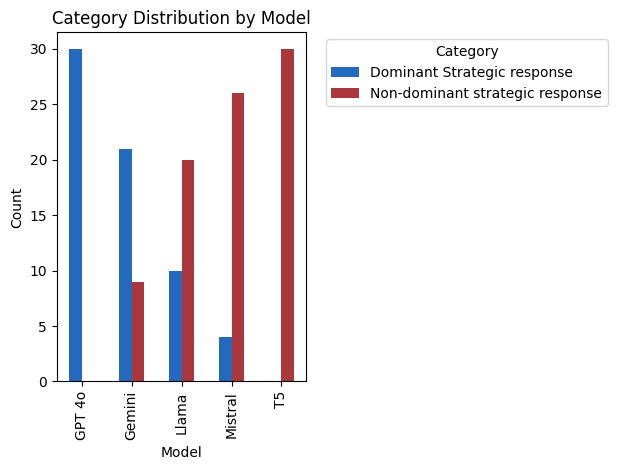

In [ ]:
# sum the amount of different values in the 'category' column per each value of the 'model' column

category_counts = small_item_zero_df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', colormap='vlag')
plt.title('Category Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


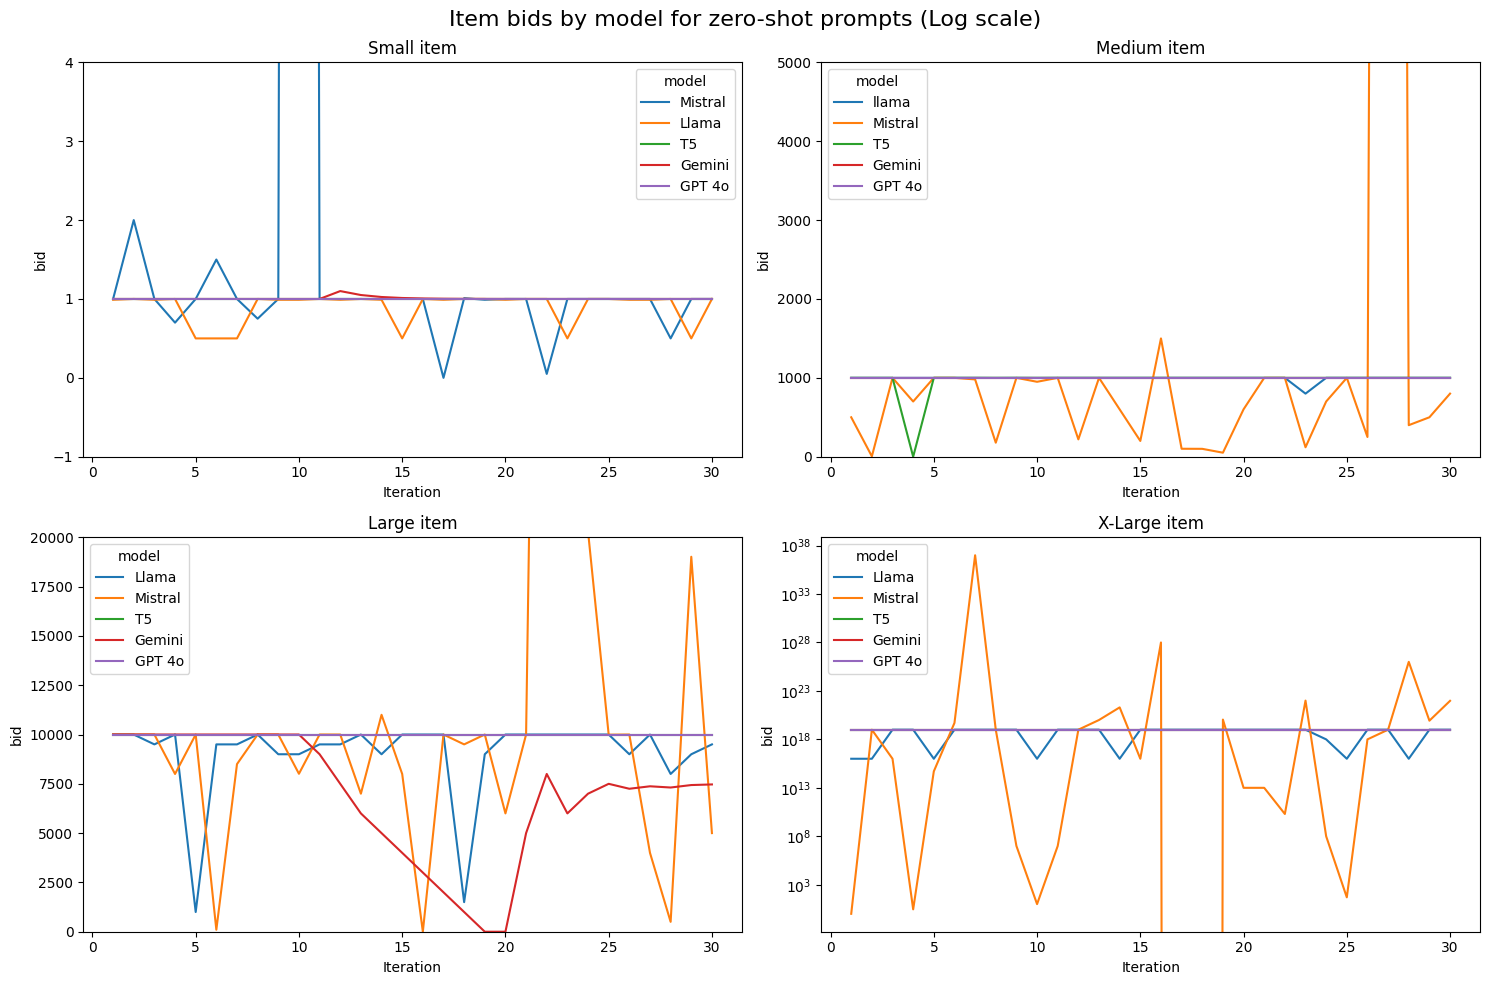

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for the plots

# Small items
sns.lineplot(x='num', y='bid', data=small_item_zero_df, hue='model', ax=axes[0, 0])
axes[0, 0].set_title('Small item')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylim(-1, 4)

# Medium items
sns.lineplot(x='num', y='bid', data=medium_item_zero_df, hue='model', ax=axes[0, 1])
axes[0, 1].set_title('Medium item')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylim(0, 5000)

# Big items
sns.lineplot(x='num', y='bid', data=big_item_zero_df, hue='model', ax=axes[1, 0])
axes[1, 0].set_title('Large item')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylim(0, 20000)

# Giant items (log scale)
sns.lineplot(x='num', y='bid', data=giant_item_zero_df, hue='model', ax=axes[1, 1])
axes[1, 1].set_title('X-Large item')
axes[1, 1].set_xlabel('Iteration')

plt.yscale('log')
fig.suptitle('Item bids by model for zero-shot prompts (Log scale)', fontsize=16)
plt.tight_layout()
plt.show()


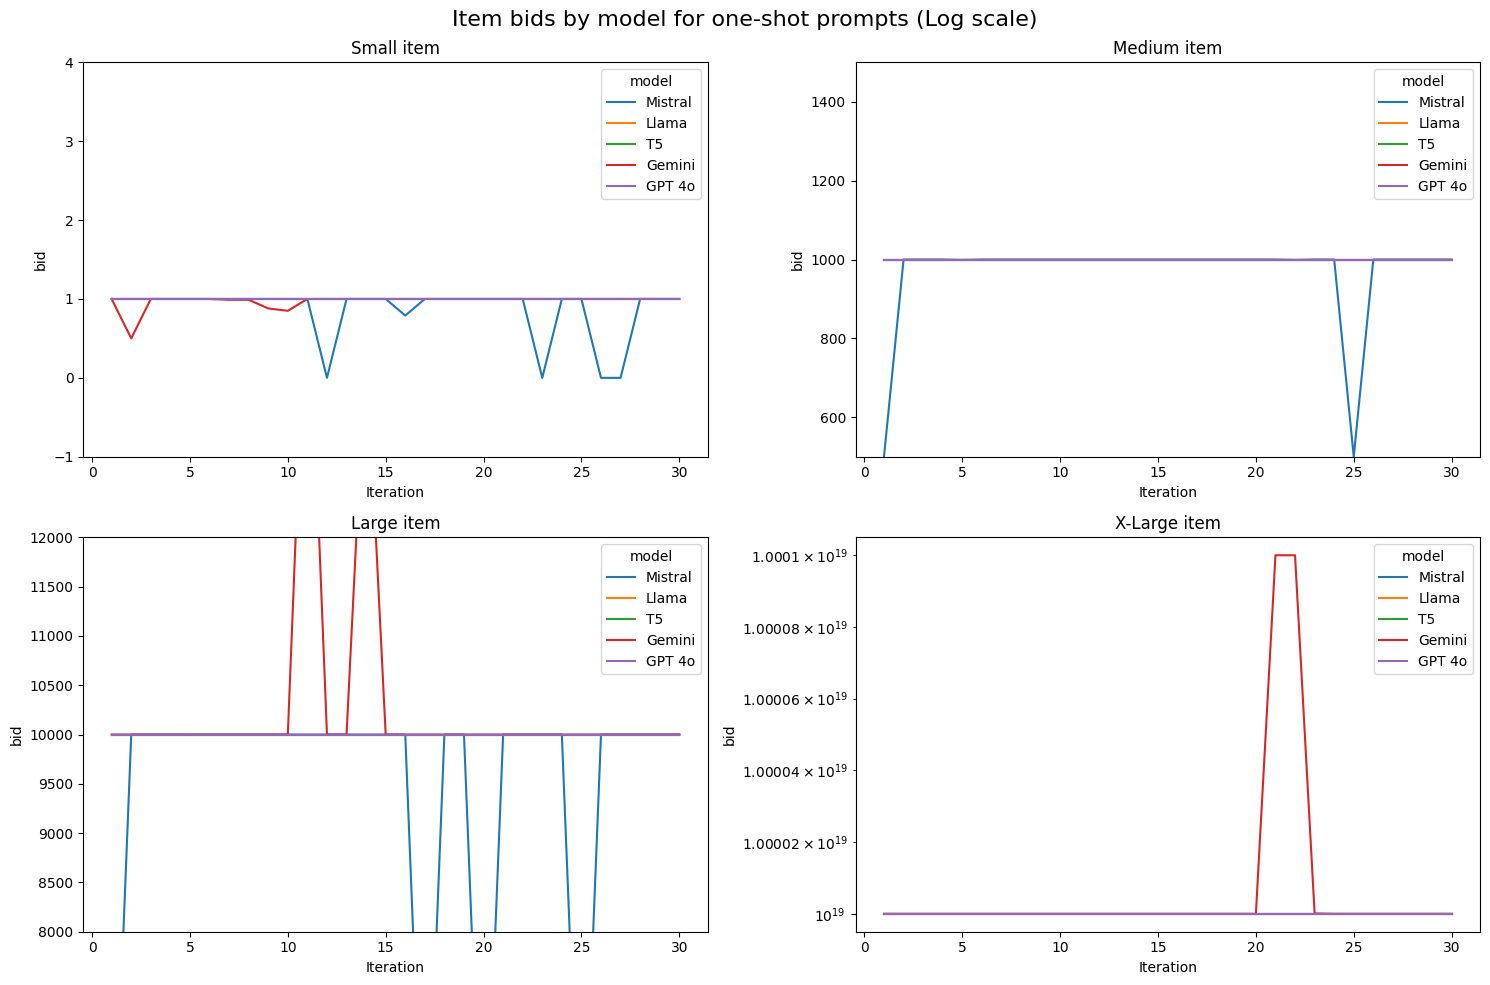

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for the plots

# Small items
sns.lineplot(x='num', y='bid', data=small_item_one_df, hue='model', ax=axes[0, 0])
axes[0, 0].set_title('Small item')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylim(-1, 4)

# Medium items
sns.lineplot(x='num', y='bid', data=medium_item_one_df, hue='model', ax=axes[0, 1])
axes[0, 1].set_title('Medium item')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylim(500, 1500)

# Big items
sns.lineplot(x='num', y='bid', data=big_item_one_df, hue='model', ax=axes[1, 0])
axes[1, 0].set_title('Large item')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylim(8000, 12000)

# Giant items (log scale)
sns.lineplot(x='num', y='bid', data=giant_item_one_df, hue='model', ax=axes[1, 1])
axes[1, 1].set_title('X-Large item')
axes[1, 1].set_xlabel('Iteration')

plt.yscale('log')
fig.suptitle('Item bids by model for one-shot prompts (Log scale)', fontsize=16)
plt.tight_layout()
plt.show()

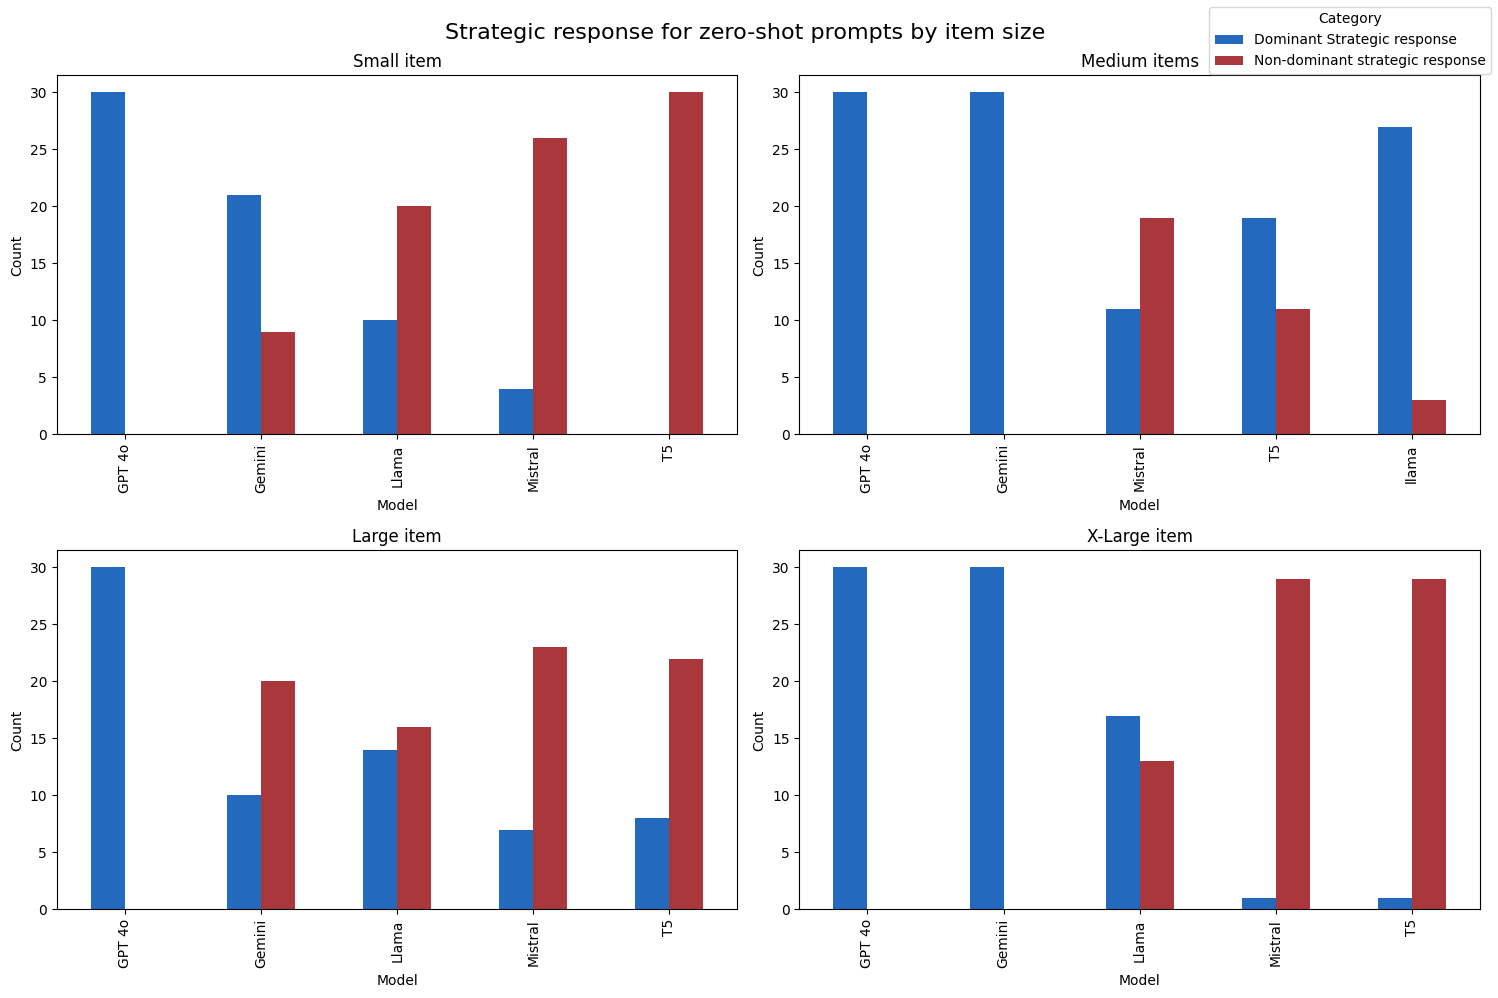

In [ ]:
# multi figure seaborn bar-plot that will sum the amount different values in the 'category' column per each value of the 'model' column. each figure will use a different data frame that ends with 'zero_df'. create a single legend in the bottom right of the graph.

dfs = [small_item_zero_df, medium_item_zero_df, big_item_zero_df, giant_item_zero_df]
df_names = ["Small item", "Medium items", "Large item", "X-Large item"]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over dataframes and plot
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    category_counts = df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)
    category_counts.plot(kind='bar', ax=axes[row, col], colormap='vlag', legend=None)
    axes[row, col].set_title(df_names[i])
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel('Count')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Category')
fig.suptitle('Strategic response for zero-shot prompts by item size', fontsize=16)
plt.tight_layout()
plt.show()


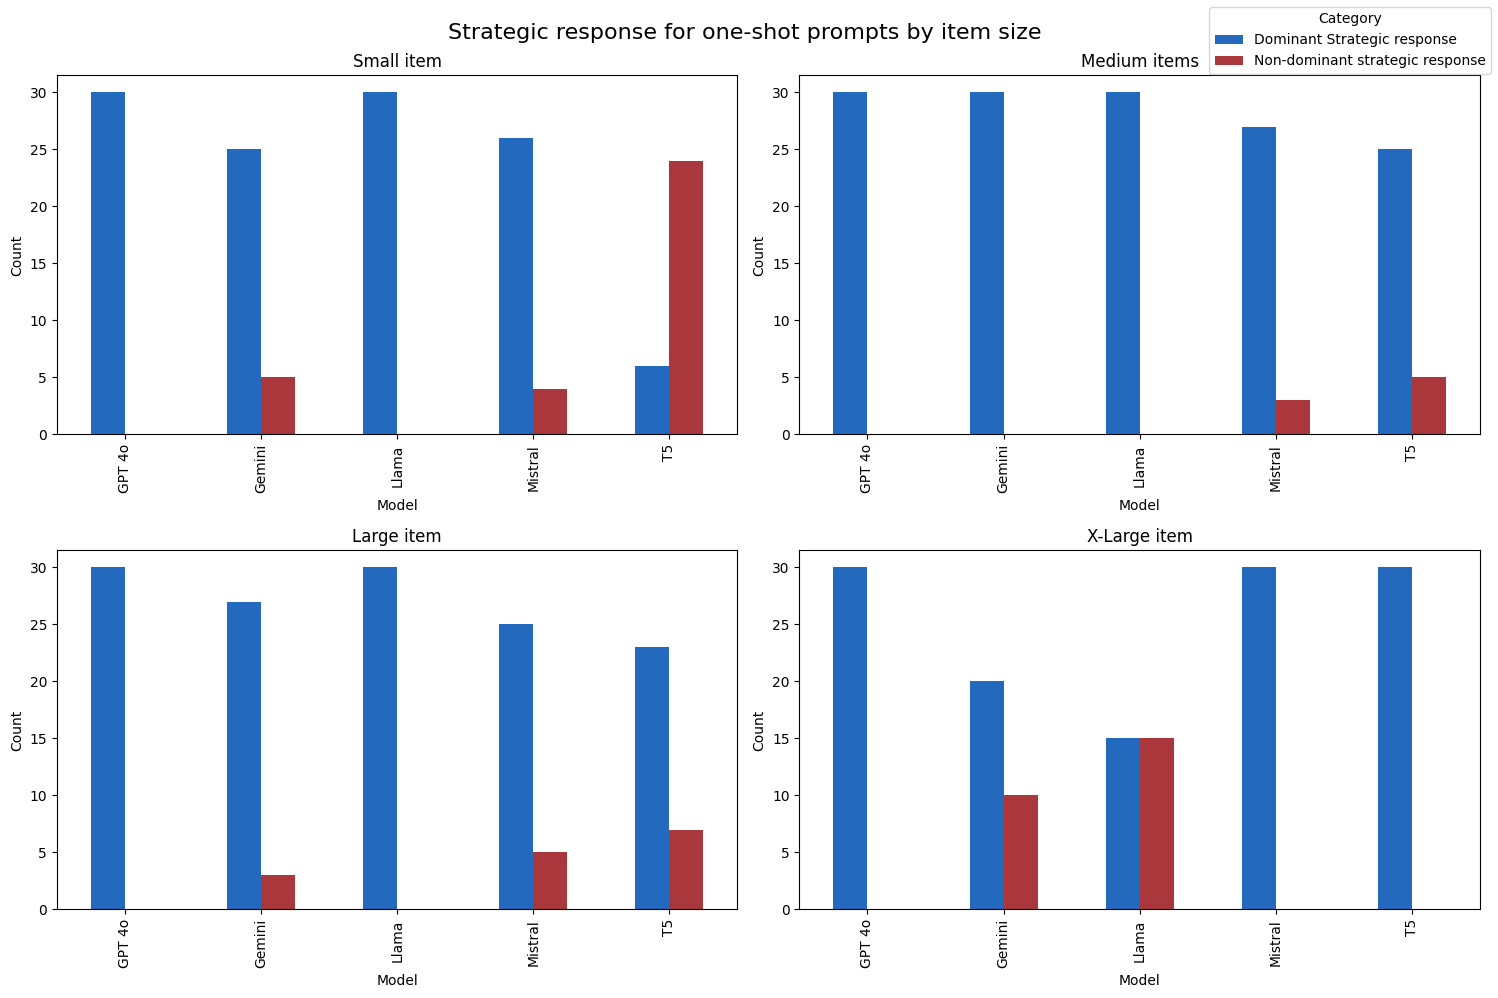

In [ ]:
dfs = [small_item_one_df, medium_item_one_df, big_item_one_df, giant_item_one_df]
df_names = ["Small item", "Medium items", "Large item", "X-Large item"]


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over dataframes and plot
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    category_counts = df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)
    category_counts.plot(kind='bar', ax=axes[row, col], colormap='vlag', legend=None)
    axes[row, col].set_title(df_names[i])
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel('Count')

# Create a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Category')

# Adjust layout and display
fig.suptitle('Strategic response for one-shot prompts by item size', fontsize=16)
plt.tight_layout()
plt.show()

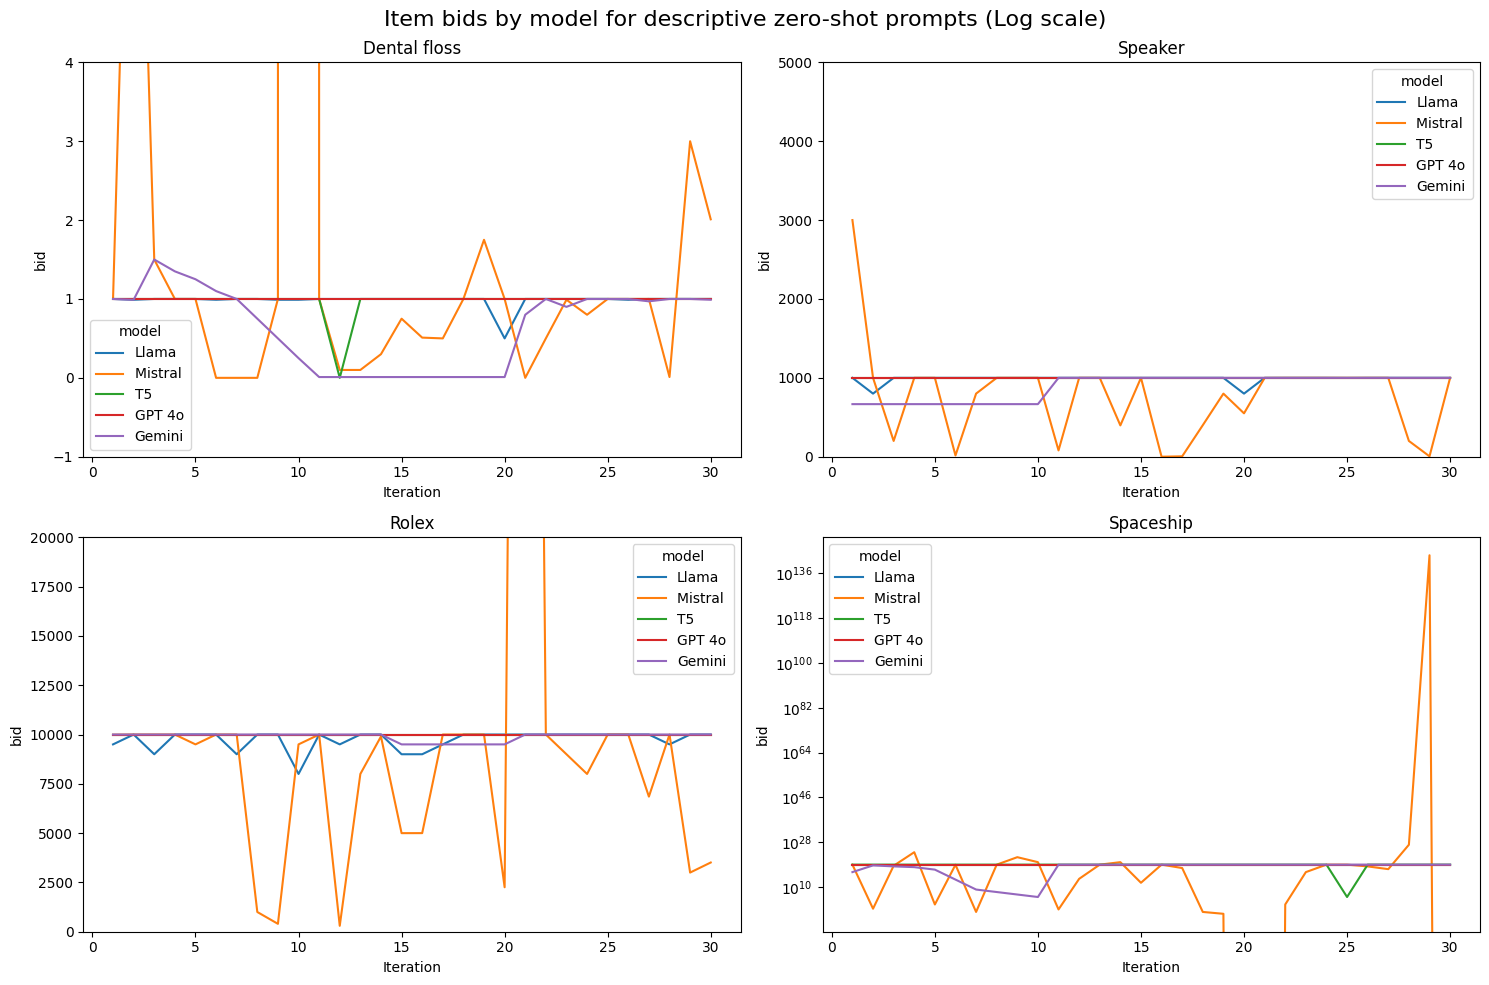

In [ ]:
############################# Descriptive Prompts ###############################
#######Zero shot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for the plots

# Small items
sns.lineplot(x='num', y='bid', data=dental_floss_zero_df, hue='model', ax=axes[0, 0])
axes[0, 0].set_title('Dental floss')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylim(-1, 4)

# Medium items
sns.lineplot(x='num', y='bid', data=speaker_zero_df, hue='model', ax=axes[0, 1])
axes[0, 1].set_title('Speaker')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylim(0, 5000)

# Big items
sns.lineplot(x='num', y='bid', data=rolex_zero_df, hue='model', ax=axes[1, 0])
axes[1, 0].set_title('Rolex')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylim(0, 20000)

# Giant items (log scale)
sns.lineplot(x='num', y='bid', data=spaceship_zero, hue='model', ax=axes[1, 1])
axes[1, 1].set_title('Spaceship')
axes[1, 1].set_xlabel('Iteration')

plt.yscale('log')
fig.suptitle('Item bids by model for descriptive zero-shot prompts (Log scale)', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# count the total number of dominant strategic behavior in the dental_floss_zero_df, speaker_zero_df, rolex_zero_df, spaceship_zero dataframes

dominant_counts = 0
for df in [dental_floss_zero_df, speaker_zero_df, rolex_zero_df, spaceship_zero_df]:
  dominant_counts += df['category'].value_counts().get('Dominant Strategic response', 0)

print("Total dominant strategic behaviors:", dominant_counts)


Total dominant strategic behaviors: 277


In [ ]:
dominant_counts = 0
for df in [dental_floss_zero_df, speaker_zero_df, rolex_zero_df, spaceship_zero_df]:
  dominant_counts += df['category'].value_counts().get('Non-dominant strategic response', 0)

print("Total non-dominant strategic behaviors:", dominant_counts)

Total non-dominant strategic behaviors: 323


In [ ]:
dominant_counts = 0
for df in [dental_floss_one_df, speaker_one_df, rolex_one_df, spaceship_one_df]:
  dominant_counts += df['category'].value_counts().get('Dominant Strategic response', 0)

print("Total dominant strategic behaviors:", dominant_counts)

Total dominant strategic behaviors: 487


In [ ]:
dominant_counts = 0
for df in [dental_floss_one_df, speaker_one_df, rolex_one_df, spaceship_one_df]:
  dominant_counts += df['category'].value_counts().get('Non-dominant strategic response', 0)

print("Total non-dominant strategic behaviors:", dominant_counts)

Total non-dominant strategic behaviors: 113


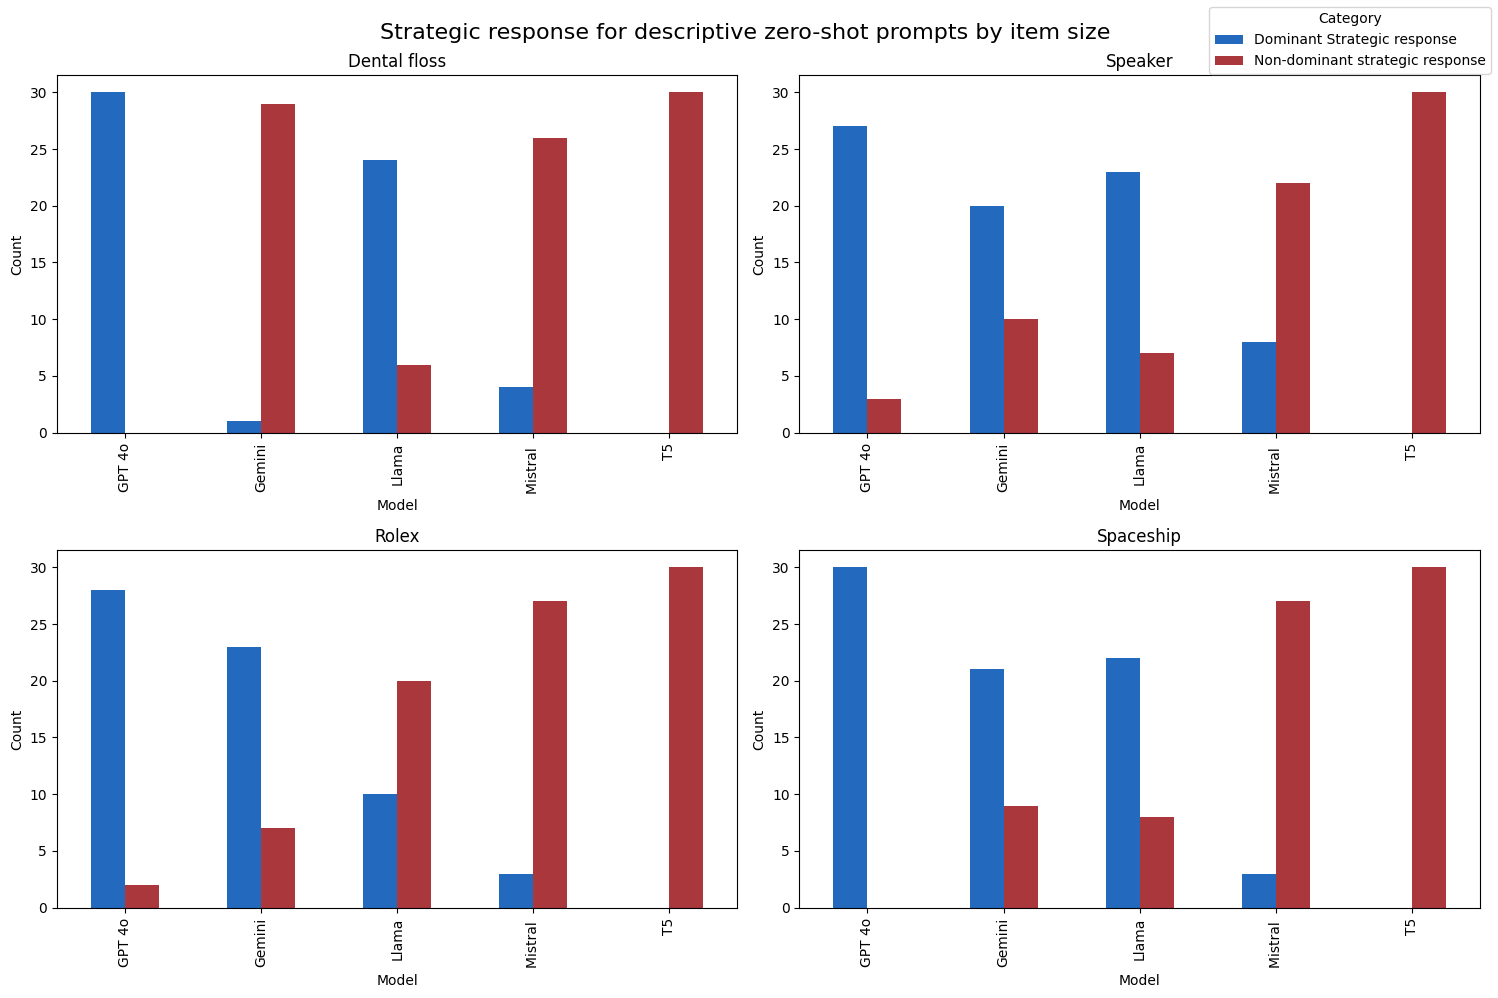

In [ ]:
# List of dataframes
dfs = [dental_floss_zero_df, speaker_zero_df, rolex_zero_df, spaceship_zero_df]
df_names = ["Dental floss", "Speaker", "Rolex", "Spaceship"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over dataframes and plot
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    category_counts = df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)
    category_counts.plot(kind='bar', ax=axes[row, col], colormap='vlag', legend=None)
    axes[row, col].set_title(df_names[i])
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel('Count')

# Create a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Category')

# Adjust layout and display
fig.suptitle('Strategic response for descriptive zero-shot prompts by item size', fontsize=16)
plt.tight_layout()
plt.show()

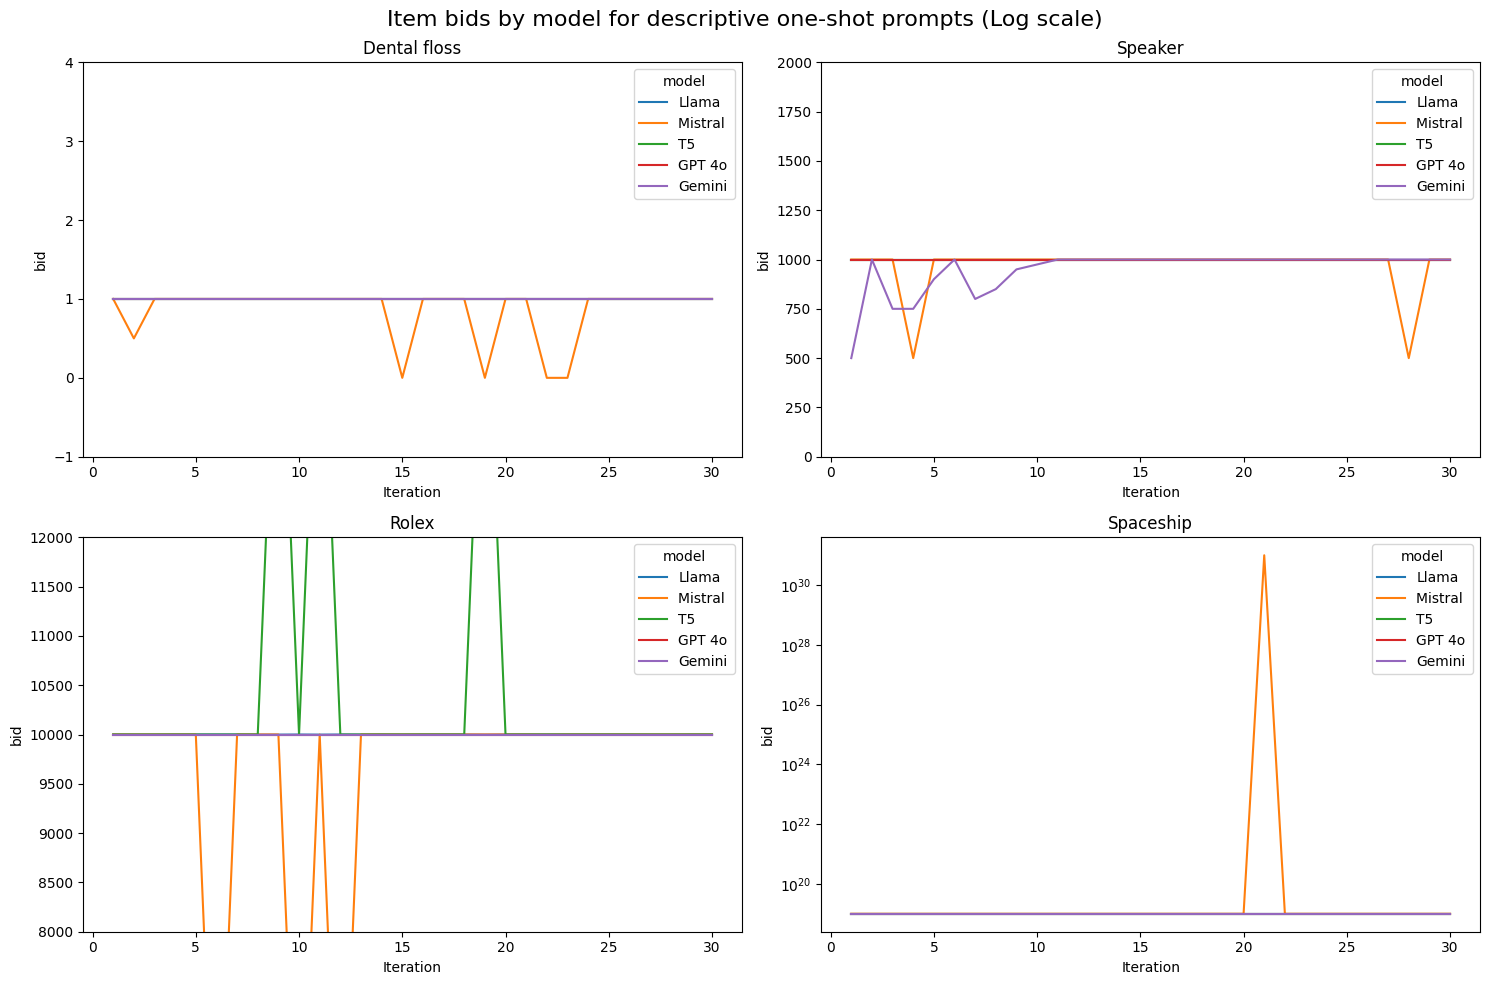

In [ ]:
#######One shot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for the plots

# Small items
sns.lineplot(x='num', y='bid', data=dental_floss_one_df, hue='model', ax=axes[0, 0])
axes[0, 0].set_title('Dental floss')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylim(-1, 4)

# Medium items
sns.lineplot(x='num', y='bid', data=speaker_one_df, hue='model', ax=axes[0, 1])
axes[0, 1].set_title('Speaker')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylim(0, 2000)

# Big items
sns.lineplot(x='num', y='bid', data=rolex_one_df, hue='model', ax=axes[1, 0])
axes[1, 0].set_title('Rolex')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylim(8000, 12000)

# Giant items (log scale)
sns.lineplot(x='num', y='bid', data=spaceship_one, hue='model', ax=axes[1, 1])
axes[1, 1].set_title('Spaceship')
axes[1, 1].set_xlabel('Iteration')

plt.yscale('log')
fig.suptitle('Item bids by model for descriptive one-shot prompts (Log scale)', fontsize=16)
plt.tight_layout()
plt.show()

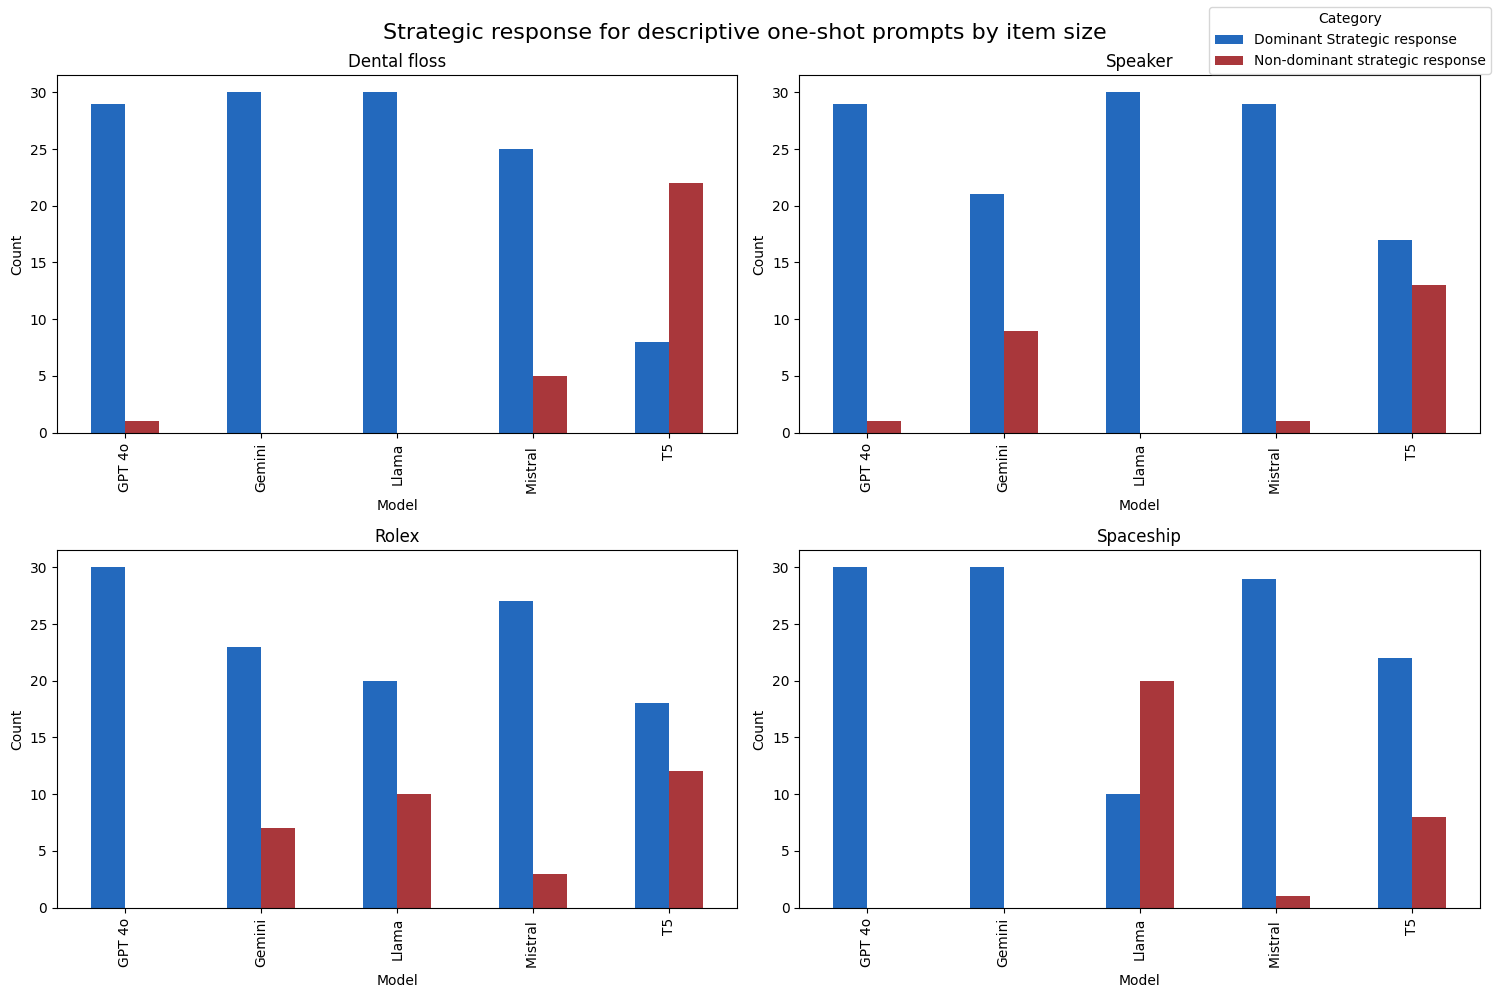

In [ ]:
dfs = [dental_floss_one_df, speaker_one_df, rolex_one_df, spaceship_one_df]
df_names = ["Dental floss", "Speaker", "Rolex", "Spaceship"]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over dataframes and plot
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    category_counts = df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)
    category_counts.plot(kind='bar', ax=axes[row, col], colormap='vlag', legend=None)
    axes[row, col].set_title(df_names[i])
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel('Count')

# Create a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Category')

# Adjust layout and display
fig.suptitle('Strategic response for descriptive one-shot prompts by item size', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid for the plots

# Dental floss
y_upper_limit = dental_floss_df['value'].mean() + 3 * dental_floss_df['bid'].std()
y_lower_limit = dental_floss_df['value'].mean() - 3 * dental_floss_df['bid'].std()

sns.lineplot(x='num', y='bid', data=dental_floss_df, hue='model', ax=axes[0, 0])
axes[0, 0].set_title('Dental floss')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylim(y_lower_limit, y_upper_limit)

# Speaker
y_upper_limit = speaker_df['value'].mean() + 3 * speaker_df['bid'].std()
y_lower_limit = speaker_df['value'].mean() - 3 * speaker_df['bid'].std()
sns.lineplot(x='num', y='bid', data=speaker_df, hue='model', ax=axes[0, 1])
axes[0, 1].set_title('Speaker')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylim(y_lower_limit, y_upper_limit)

# Rolex
y_upper_limit = rolex_df['value'].mean() + 3 * rolex_df['bid'].std()
y_lower_limit = rolex_df['value'].mean() - 3 * rolex_df['bid'].std()
sns.lineplot(x='num', y='bid', data=rolex_df, hue='model', ax=axes[1, 0])
axes[1, 0].set_title('Rolex')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylim(y_lower_limit, y_upper_limit)

# Spaceship
y_upper_limit = spaceship_df['value'].mean() + 30000 * spaceship_df['bid'].std()
y_lower_limit = spaceship_df['value'].mean() - 30000 * spaceship_df['bid'].std()
sns.lineplot(x='num', y='bid', data=spaceship_df, hue='model', ax=axes[1, 1])
axes[1, 1].set_title('Spaceship')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylim(y_lower_limit, y_upper_limit)

fig.suptitle('Item Bids by model descriptive prompts (Log Scale)', fontsize=16)
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
# List of dataframes
dfs = [dental_floss_df, speaker_df, rolex_df, spaceship_df]
df_names = ["Dental floss", "Speaker", "Rolex", "Spaceship"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over dataframes and plot
for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    category_counts = df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)
    category_counts.plot(kind='bar', ax=axes[row, col], colormap='vlag', legend=None)
    axes[row, col].set_title(df_names[i])
    axes[row, col].set_xlabel('Model')
    axes[row, col].set_ylabel('Count')

# Create a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Category')

# Adjust layout and display
fig.suptitle('Strategic response for descriptive prompts by item size', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: use the add_df dataframe to display a bar graph that will sum the amount of different values in the 'category' column per each value of the 'model' column.
add_df = pd.concat([small_item_zero_df,small_item_one_df, medium_item_zero_df, medium_item_one_df, big_item_zero_df, big_item_one_df, giant_item_zero_df, giant_item_one_df], ignore_index=True)
category_counts = add_df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', colormap='vlag')
plt.title('Overall model performance by category')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# calculate the variability between the zero shot and one shot dataframes (within each category: small, medium, big, giant). output the results as a LaTeX table

# Calculate variability within each category
variability_data = []
for category_df, category_name in zip(
    [small_item_zero_df, medium_item_zero_df, big_item_zero_df, giant_item_zero_df, small_item_one_df, medium_item_one_df, big_item_one_df, giant_item_one_df],
    ["Small Zero", "Medium Zero", "Big Zero", "Giant Zero", "Small One", "Medium One", "Big One", "Giant One"]
):
    model_variability = category_df.groupby('model')['bid'].std()
    variability_data.append([category_name] + model_variability.tolist())

# Create LaTeX table
table = tabulate(variability_data, headers=['Category', 'GPT 4o', 'Gemini', 'Llama', 'Mistral', 'T5'], tablefmt='latex_raw')

print(table)


\begin{tabular}{lrrrrr}
\hline
 Category    &   GPT 4o &         Gemini &           Llama &         Mistral &      T5 \\
\hline
 Small Zero  &        0 &    0.0203463   &     0.201774    &    18.0876      &  0      \\
 Medium Zero &        0 &    0           & 10836.4         &   182.574       & 36.5031 \\
 Big Zero    &        0 & 3162.59        &  2178.83        & 14113.5         &  0      \\
 Giant Zero  &        0 &    0           &     4.44094e+18 &     1.82574e+36 &  0      \\
 Small One   &        0 &    0.0958261   &     0           &     0.345079    &  0      \\
 Medium One  &        0 &    0           &     0           &   126.836       &  0      \\
 Big One     &        0 & 1149.21        &     0           &  1728.7         &  0      \\
 Giant One   &        0 &    2.53699e+14 &     0           &     0           &  0      \\
\hline
\end{tabular}


In [ ]:
# Calculate variability within each category
variability_data = []
for category_df, category_name in zip(
    [dental_floss_zero_df, speaker_zero_df, rolex_zero_df, spaceship_zero_df, dental_floss_one_df, speaker_one_df, rolex_one_df, spaceship_one_df],
    ["Dental floss Zero-shot", "Speaker Zero-shot", "Rolex Zero-shot", "Spaceship Zero-shot", "Dental floss One-shot", "Speaker One-shot", "Rolex One-shot", "Spaceship One-shot"]
):
    model_variability = category_df.groupby('model')['bid'].std()
    variability_data.append([category_name] + model_variability.tolist())

# Create LaTeX table
table = tabulate(variability_data, headers=['Category', 'GPT 4o', 'Gemini', 'Llama', 'Mistral', 'T5'], tablefmt='latex_raw')

print(table)

\begin{tabular}{lrrrrr}
\hline
 Category               &   GPT 4o &        Gemini &       Llama &          Mistral &             T5 \\
\hline
 Dental floss Zero-shot &        0 &   0.507258    &   0.0910507 &   368.287        &    0.182574    \\
 Speaker Zero-shot      &        0 & 159.82        &  50.732     &   576.896        &    0           \\
 Rolex Zero-shot        &        0 & 203.419       & 486.394     & 20787.3          &    0           \\
 Spaceship Zero-shot    &        0 &   4.49655e+18 &   0         &     3.65148e+142 &    1.82574e+18 \\
 Dental floss One-shot  &        0 &   0           &   0         &     0.351107     &    0           \\
 Speaker One-shot       &        0 & 113.427       &   0         &   126.854        &    0           \\
 Rolex One-shot         &        0 &   0           &   0.479463  &  1525.63         & 1525.64        \\
 Spaceship One-shot     &        0 &   0           &   0         &     1.82574e+30  &    0           \\
\hline
\end{tabular}


In [ ]:
# Calculate variability within each category
variability_data = []
for category_df, category_name in zip(
    [small_item_zero_df, medium_item_zero_df, big_item_zero_df, giant_item_zero_df, small_item_one_df, medium_item_one_df, big_item_one_df, giant_item_one_df],
    ["Small Zero", "Medium Zero", "Big Zero", "Giant Zero", "Small One", "Medium One", "Big One", "Giant One"]
):
    model_variability = category_df.groupby('model')['bid'].std()
    variability_data.append([category_name] + model_variability.tolist())

# Create LaTeX table
table = tabulate(variability_data, headers=['Category', 'GPT 4o', 'Gemini', 'Llama', 'Mistral', 'T5'], tablefmt='latex_raw')

print(table)

In [ ]:
# Create a list to store t-test results
t_test_results = []

# Iterate through item sizes
for item_size in ["small", "medium", "big", "giant"]:
    # Get data for zero-shot and one-shot experiments
    zero_shot_data = eval(f"{item_size}_item_zero_df")['bid']
    one_shot_data = eval(f"{item_size}_item_one_df")['bid']

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(zero_shot_data, one_shot_data)

    # Store results
    t_test_results.append({
        "item_size": item_size,
        "t_statistic": t_statistic,
        "p_value": p_value
    })

# Display t-test results
print(tabulate(t_test_results, headers="keys", tablefmt="latex_raw"))


\begin{tabular}{lrr}
\hline
 item_size   &   t_statistic &   p_value \\
\hline
 small       &      1.00529  &  0.315575 \\
 medium      &      0.815589 &  0.415387 \\
 big         &     -0.665192 &  0.506442 \\
 giant       &      1        &  0.318122 \\
\hline
\end{tabular}


In [ ]:

# Create a list to store t-test results
t_test_results = []

# Iterate through item sizes
for item_size in ["dental_floss", "speaker", "rolex", "spaceship"]:
    # Get data for zero-shot and one-shot experiments
    zero_shot_data = eval(f"{item_size}_zero_df")['bid']
    one_shot_data = eval(f"{item_size}_one_df")['bid']

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(zero_shot_data, one_shot_data)

    # Store results
    t_test_results.append({
        "item_size": item_size,
        "t_statistic": t_statistic,
        "p_value": p_value
    })

# Display t-test results
print(tabulate(t_test_results, headers="keys", tablefmt="latex_raw"))

\begin{tabular}{lrr}
\hline
 item_size    &   t_statistic &   p_value \\
\hline
 dental_floss &      0.998085 &  0.319048 \\
 speaker      &     -2.18894  &  0.029377 \\
 rolex        &      0.266684 &  0.789897 \\
 spaceship    &      1        &  0.318122 \\
\hline
\end{tabular}


In [ ]:
# prompt: show the t-test statistic and p-value between the one-shot and descriptive prompts experiments. output the table as latex

# Create a list to store t-test results
t_test_results = []
dental_floss_df, speaker_df, rolex_df, spaceship_df
item_size_dict = {
    "dental_floss":"small",
    "speaker":"medium",
    "rolex":"big",
    "spaceship":"giant"
}

# Iterate through items
for item in ["dental_floss", "speaker", "rolex", "spaceship"]:

    # Get data for one-shot and descriptive prompts experiments
    one_shot_data = eval(f"{item_size_dict[item]}_item_one_df")['bid']
    descriptive_data = eval(f"{item}_df")['bid']

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(one_shot_data, descriptive_data)

    # Store results
    t_test_results.append({
        "item": item,
        "t_statistic": t_statistic,
        "p_value": p_value
    })

# Display t-test results
print(tabulate(t_test_results, headers="keys", tablefmt="latex_raw"))


<Figure size 1200x600 with 0 Axes>

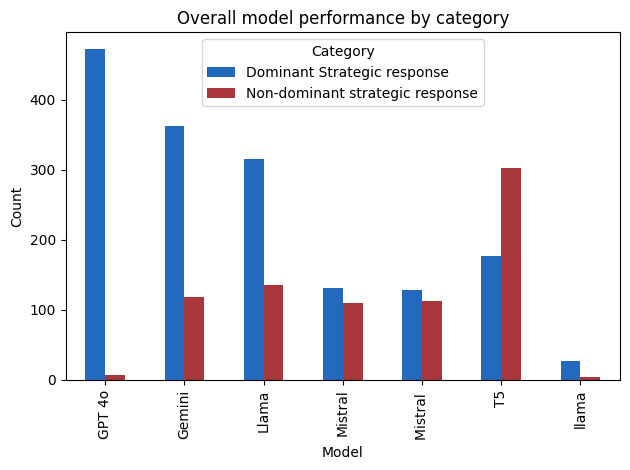

In [ ]:
add_df = pd.concat([small_item_zero_df,small_item_one_df, medium_item_zero_df, medium_item_one_df, big_item_zero_df, big_item_one_df, giant_item_zero_df, giant_item_one_df, dental_floss_zero_df, dental_floss_one_df, rolex_zero_df, rolex_one_df, speaker_zero_df, speaker_one_df, spaceship_zero_df, spaceship_one_df], ignore_index=True)
category_counts = add_df.groupby(['model', 'category'])['category'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', colormap='vlag')
plt.title('Overall model performance by category')
plt.xlabel('Model')
plt.ylabel('Count')
plt.legend(title='Category',loc='upper center')
plt.tight_layout()
plt.show()

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
excel_path = 'items and prompts.xlsx'
excel_data = pd.ExcelFile(excel_path)

In [5]:
# Analyze the relationship between reasoning and bids
all_results = []

def analyze_reasoning_vs_bid(sheet_name):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        # Normalize the column names by stripping spaces and converting to lowercase
        df.columns = df.columns.str.strip().str.lower()

        # Check if the required columns exist
        if 'category' in df.columns and 'bid' in df.columns:
            # Convert the bid column to numeric, forcing errors to NaN
            df['bid'] = pd.to_numeric(df['bid'], errors='coerce')

            df = df.dropna(subset=['bid']) # Drop NaN

            grouped = df.groupby('category')['bid'].agg(['mean', 'median', 'count'])

            grouped['sheet_name'] = sheet_name

            all_results.append(grouped.reset_index())
        else:
            print(f"Skipping {sheet_name}: 'category' or 'bid' column not found.\n" + "-"*40 + "\n")

    except Exception as e:
        print(f"Error processing {sheet_name}: {e}\n" + "-"*40 + "\n")

for sheet in excel_data.sheet_names:
    if sheet not in ['summary ']:  # Skipping non-data sheets
        analyze_reasoning_vs_bid(sheet)

if all_results:
    combined_results = pd.concat(all_results)

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
combined_results.to_csv("combined_results.csv")

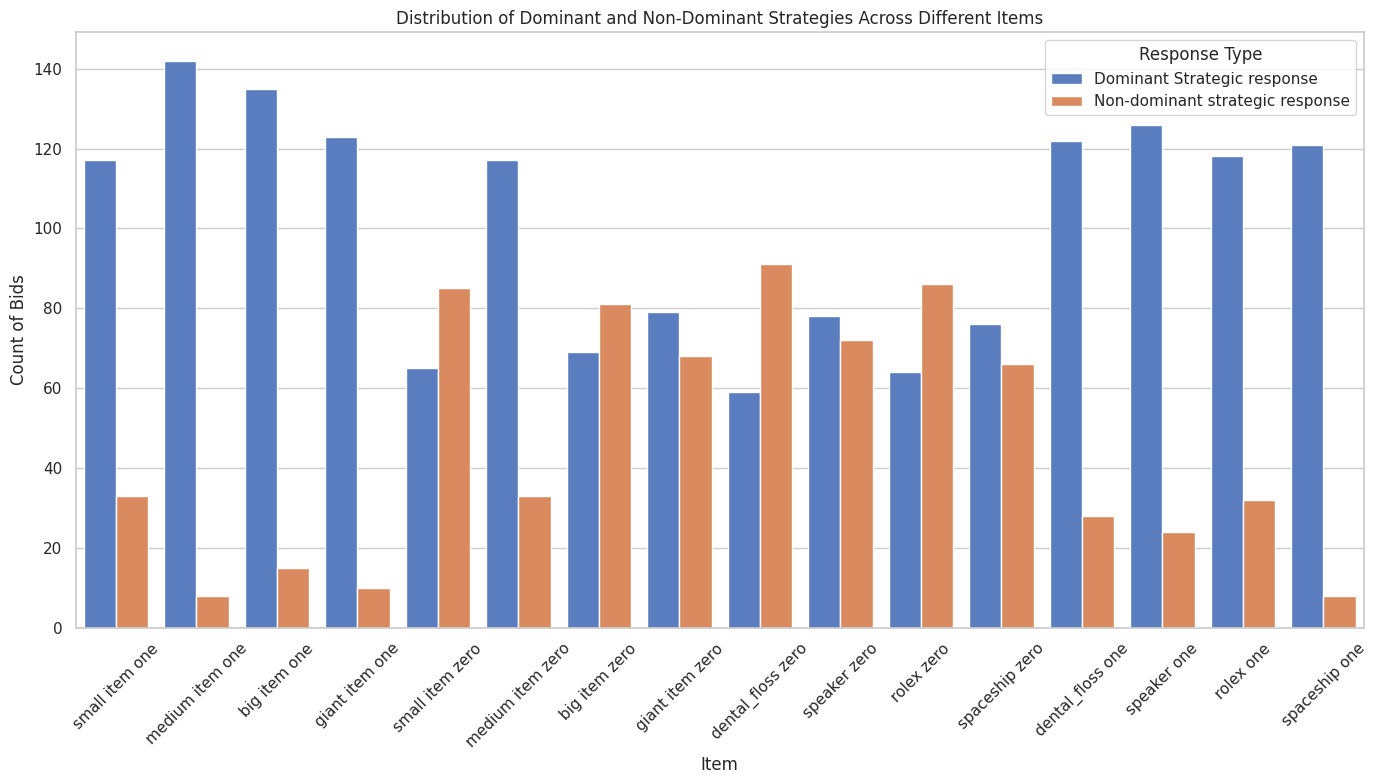

In [6]:
sns.set(style="whitegrid")

# Create a bar chart showing the count of bids for each combination of category and sheet_name
plt.figure(figsize=(14, 8))
sns.barplot(x="sheet_name", y="count", hue="category", data=combined_results, palette="muted")
plt.title("Distribution of Dominant and Non-Dominant Strategies Across Different Items")
plt.ylabel("Count of Bids")
plt.xlabel("Item")
plt.xticks(rotation=45)
plt.legend(title="Response Type")
plt.tight_layout()
plt.show()

<ipython-input-7-afdbadd3ec82>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-7-afdbadd3ec82>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


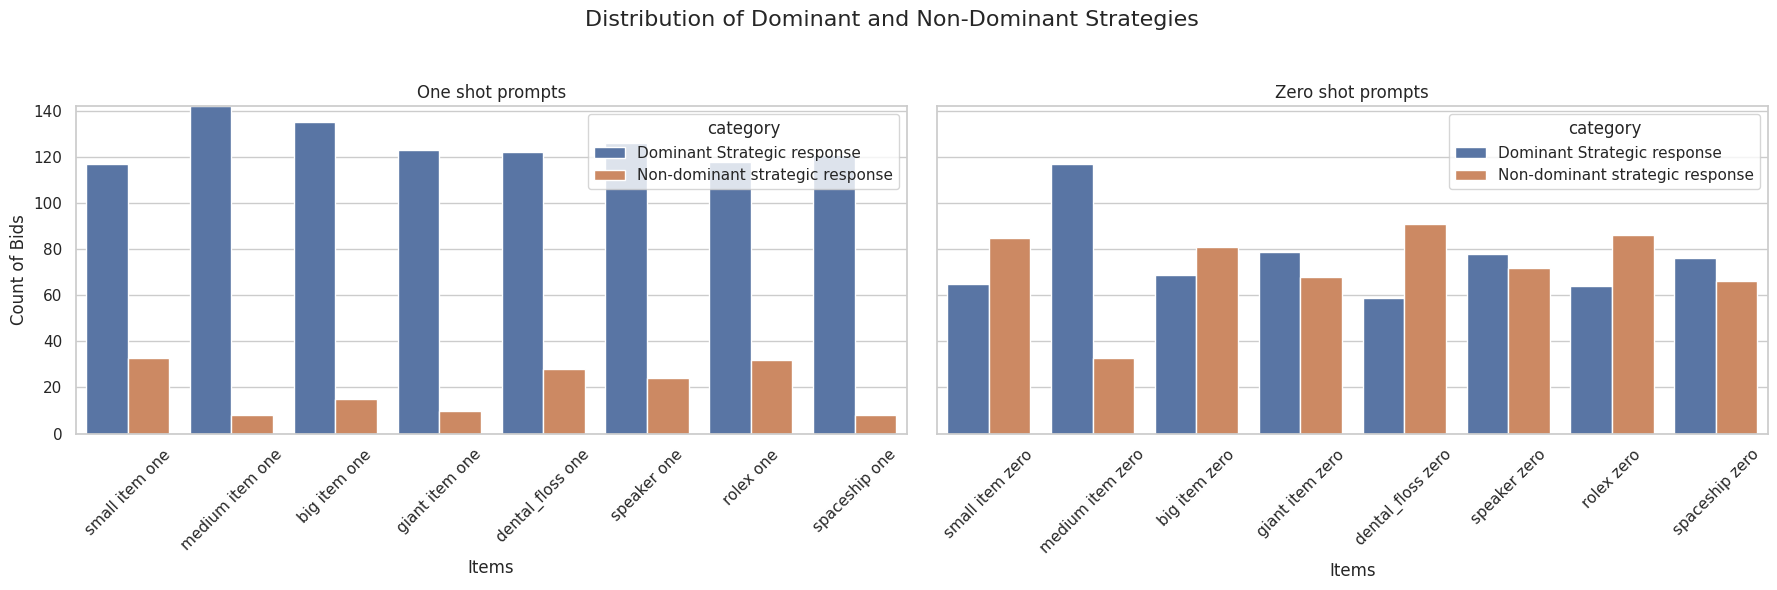

In [7]:
def create_side_by_side_plots(data):
    # Filter data for items ending with 'one' and 'zero'
    data_one = data[data['sheet_name'].str.endswith('one')]
    data_zero = data[data['sheet_name'].str.endswith('zero')]

    # Determine the maximum y-value (count of bids) for setting consistent y-axis limits
    max_y_value = max(data_one['count'].max(), data_zero['count'].max())

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

    # Plot for 'one' items
    sns.barplot(ax=axes[0], data=data_one, x='sheet_name', y='count', hue='category')
    axes[0].set_ylim(0, max_y_value)
    axes[0].set_title('One shot prompts')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_ylabel('Count of Bids')
    axes[0].set_xlabel('Items')


    # Plot for 'zero' items
    sns.barplot(ax=axes[1], data=data_zero, x='sheet_name', y='count', hue='category')
    axes[1].set_ylim(0, max_y_value)
    axes[1].set_title('Zero shot prompts')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xlabel('Items')

    # Set common title
    fig.suptitle('Distribution of Dominant and Non-Dominant Strategies', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Call the function to create the side-by-side plots
create_side_by_side_plots(combined_results)

The graphs depict the distribution of bidding strategies employed by various LLMs in a simulated second-price auction. These strategies are classified as either "Dominant Strategic Response" or "Non-dominant Strategic Response."


1. Effectiveness of One-Shot Prompts:
- The graph on the left, representing one-shot prompts, shows a strong preference for dominant strategic responses across all items. This suggests that when the LLMs are given an example (one-shot prompt), they are more likely to follow the dominant strategy: bid their true valuation in a second-price auction.
- The high consistency in dominant strategies across different items in the one-shot scenario indicates that the models better understand the auction dynamics when provided with an example.

2. Variability in Zero-Shot Prompts:
- In contrast, the graph on the right, representing zero-shot prompts, shows a more balanced distribution between dominant and non-dominant strategies. This indicates that LLMs need an example to follow the dominant strategy consistently.
- The variability in responses suggests that LLMs may struggle to apply the dominant strategy consistently when they must infer the appropriate behavior without explicit guidance.

3. Strategic Implications:
- For tasks requiring consistent strategic behavior, such as auctions or economic modeling, using one-shot prompts can effectively steer LLMs toward the desired outcome.
- However, in scenarios where varied responses are acceptable or desired, zero-shot prompts could offer valuable insights into how LLMs interpret and respond to the same situation.


4. Item Description's Limited Influence on Strategy:
- Consistency Across Descriptions: Interestingly, even when specific items were described to the models, there was no significant effect on the strategy employed by the LLMs. Whether the item was a "small item" or a "Rolex," the LLMs did not adjust their strategy based on the item's description alone. This suggests that the models may not fully comprehend the contextual significance of different items, relying instead on more general patterns learned during training.
- Implications for Model Design: This observation points to a potential limitation in current LLMs, where the descriptive context of an item does not substantially alter their strategic approach. This could indicate a gap in how these models process and weigh specific contextual details when making decisions.

In [8]:
# Analyze the percentage of value == bid, split by category and sheet

percentage_results = []

def analyze_value_equals_bid_percentage_by_category(sheet_name):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        # Normalize the column names
        df.columns = df.columns.str.strip().str.lower()

        if 'category' in df.columns and 'bid' in df.columns and 'value' in df.columns:
            # Convert the bid and value columns to numeric, forcing errors to NaN
            df['bid'] = pd.to_numeric(df['bid'], errors='coerce')
            df['value'] = pd.to_numeric(df['value'], errors='coerce')

            df = df.dropna(subset=['bid', 'value'])

            # Total counts for each category
            total_dominant = df[df['category'] == 'Dominant Strategic response'].shape[0]
            total_non_dominant = df[df['category'] == 'Non-dominant strategic response'].shape[0]

            # Counts where value == bid
            dominant_match = df[
                (df['category'] == 'Dominant Strategic response') &
                (df['value'] == df['bid'])
            ].shape[0]

            non_dominant_match = df[
                (df['category'] == 'Non-dominant strategic response') &
                (df['value'] == df['bid'])
            ].shape[0]

            dominant_percentage = (dominant_match / total_dominant * 100) if total_dominant > 0 else 0
            non_dominant_percentage = (non_dominant_match / total_non_dominant * 100) if total_non_dominant > 0 else 0

            percentage_results.append({
                'sheet_name': sheet_name,
                'dominant_percentage': dominant_percentage,
                'non_dominant_percentage': non_dominant_percentage
            })

    except Exception as e:
        print(f"Error processing {sheet_name}: {e}\n" + "-"*40 + "\n")

# Iterate over each sheet and perform the analysis
for sheet in excel_data.sheet_names:
    if sheet not in ['summary ']:  # Skipping non-data sheets
        analyze_value_equals_bid_percentage_by_category(sheet)

percentage_df = pd.DataFrame(percentage_results)
percentage_df

,sheet_name,dominant_percentage,non_dominant_percentage
0,small item one,98.29,75.76
1,medium item one,99.30,62.50
2,big item one,99.26,53.33
3,giant item one,100.00,70.00
4,small item zero,100.00,58.82
5,medium item zero,98.29,30.30
6,big item zero,97.10,28.40
7,giant item zero,100.00,54.41
8,dental_floss zero,100.00,46.15
9,speaker zero,98.72,61.11


In [ ]:
percentage_df.to_csv("percentage_df.csv")

**Analysis of Percentage of Value == Bid, Split by Category and Sheet**

The Analysis shows the percentage of cases where the bid equals the value, split by dominant and non-dominant strategic responses across different items.


**Dominant Strategic Responses**
* Consistent High Accuracy: Across all items and categories, the percentage of cases where the bid equals the value for dominant strategic responses is consistently high, typicaly between 97% and 100%. This suggests that the models effectively align bids with values when following dominant strategies.


**Non-Dominant Strategic Responses**
* Lower Alignment: on-dominant strategies show significantly lower alignment, particularly in items like "big item zero" (28.40%) and "medium item zero" (30.30%), highlighting the models' inconsistency when deviating from the dominant strategy.

* Higher Alignment in Specific Items: Some items, like "small item one" (75.76%) and "dental_floss one" (82.14%), still maintain relatively high alignment, even with non-dominant strategies.

**Comparative Analysis Between "one" and "zero" Categories:**
* One-Shot" Category:
Shows strong alignment in both dominant and non-dominant strategies. The dominant strategy percentages are near-perfect, and even non-dominant strategies maintain reasonably high alignment in several cases, such as "small item one" (75.76%) and "speaker one" (62.50%).

* "Zero-Shot" Category:
The "zero-shot" category exhibits more significant variability, particularly in non-dominant strategies. The percentages in this category are generally lower, indicating that the "zero-shot" scenarios may present more challenging conditions or scenarios where non-dominant strategies are less effective.



In [9]:
analysis_results = []

def analyze_bid_value_difference_by_category(sheet_name):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        # Normalize the column names
        df.columns = df.columns.str.strip().str.lower()

        # Normalize the category column to ensure case insensitivity and remove extra spaces
        df['category'] = df['category'].str.strip().str.lower()

        if 'category' in df.columns and 'bid' in df.columns and 'value' in df.columns:
            # Convert the bid and value columns to numeric, forcing errors to NaN
            df['bid'] = pd.to_numeric(df['bid'], errors='coerce')
            df['value'] = pd.to_numeric(df['value'], errors='coerce')

            df = df.dropna(subset=['bid', 'value'])

            # Calculate bid-value difference
            df['bid_value_difference'] = df['bid'] - df['value']

            # Update condition labels to match the normalized 'category' column
            dominant_label = 'dominant strategic response'
            non_dominant_label = 'non-dominant strategic response'

            # Total counts for each category
            total_dominant = df[df['category'] == dominant_label].shape[0]
            total_non_dominant = df[df['category'] == non_dominant_label].shape[0]

            # Count occurrences based on conditions
            dominant_bid_eq_value = df[(df['category'] == dominant_label) & (df['bid_value_difference'] == 0)].shape[0]
            dominant_bid_ne_value = df[(df['category'] == dominant_label) & (df['bid_value_difference'] != 0)].shape[0]
            not_dominant_bid_eq_value = df[(df['category'] == non_dominant_label) & (df['bid_value_difference'] == 0)].shape[0]
            not_dominant_bid_ne_value = df[(df['category'] == non_dominant_label) & (df['bid_value_difference'] != 0)].shape[0]

            # Calc %
            dominant_bid_eq_value_pct = (dominant_bid_eq_value / total_dominant * 100) if total_dominant > 0 else 0
            dominant_bid_ne_value_pct = (dominant_bid_ne_value / total_dominant * 100) if total_dominant > 0 else 0
            not_dominant_bid_eq_value_pct = (not_dominant_bid_eq_value / total_non_dominant * 100) if total_non_dominant > 0 else 0
            not_dominant_bid_ne_value_pct = (not_dominant_bid_ne_value / total_non_dominant * 100) if total_non_dominant > 0 else 0

            analysis_results.append({
                'item': sheet_name,
                'dominant_bid_eq_value_pct': dominant_bid_eq_value_pct,
                'dominant_bid_ne_value_pct': dominant_bid_ne_value_pct,
                'not_dominant_bid_eq_value_pct': not_dominant_bid_eq_value_pct,
                'not_dominant_bid_ne_value_pct': not_dominant_bid_ne_value_pct
            })

    except Exception as e:
        print(f"Error processing {sheet_name}: {e}\n" + "-"*40 + "\n")

# Iterate over each sheet and perform the analysis
for sheet in excel_data.sheet_names:
    if sheet not in ['summary ']:  # Skipping non-data sheets
        analyze_bid_value_difference_by_category(sheet)

analysis_df = pd.DataFrame(analysis_results)

analysis_df

,item,dominant_bid_eq_value_pct,dominant_bid_ne_value_pct,not_dominant_bid_eq_value_pct,not_dominant_bid_ne_value_pct
0,small item one,98.29,1.71,75.76,24.24
1,medium item one,99.30,0.70,62.50,37.50
2,big item one,99.26,0.74,53.33,46.67
3,giant item one,100.00,0.00,70.00,30.00
4,small item zero,100.00,0.00,58.82,41.18
5,medium item zero,98.29,1.71,30.30,69.70
6,big item zero,97.10,2.90,28.40,71.60
7,giant item zero,100.00,0.00,54.41,45.59
8,dental_floss zero,100.00,0.00,46.15,53.85
9,speaker zero,98.72,1.28,61.11,38.89


* Dominant Strategy Reliability: The results strongly suggest that dominant strategies are highly reliable for ensuring bid-value alignment. Models following these strategies show consistently high percentages of correct bids across all item types and scenarios.
* Variability in Non-Dominant Strategies: There is significant variability in the effectiveness of non-dominant strategies, especially in more complex or context-limited scenarios. This highlights the importance of encouraging models to adhere to dominant strategies to maintain consistent performance.
* Scenario Sensitivity: The slight differences between "one" and "zero" prompts scenarios in non-dominant strategies suggest that additional context (as in "one" scenarios) may help models make better decisions, even when not following the dominant strategy (and use different strategy)

In [10]:
# Analyze the difference between value and bid

difference_results = []

def analyze_difference_by_model(sheet_name):
    try:
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        # Normalize the column names
        df.columns = df.columns.str.strip().str.lower()

        if 'category' in df.columns and 'bid' in df.columns and 'value' in df.columns and 'model' in df.columns:
            # Convert the bid and value columns to numeric, forcing errors to NaN
            df['bid'] = pd.to_numeric(df['bid'], errors='coerce')
            df['value'] = pd.to_numeric(df['value'], errors='coerce')
            df = df.dropna(subset=['bid', 'value'])

            # Calc the difference between value and bid
            df['difference'] = df['value'] - df['bid']

            stats = df.groupby('model')['difference'].agg(['mean', 'min', 'max'])

            stats['sheet_name'] = sheet_name

            difference_results.append(stats.reset_index())

    except Exception as e:
        print(f"Error processing {sheet_name}: {e}\n" + "-"*40 + "\n")

# Iterate over each sheet and perform the analysis
for sheet in excel_data.sheet_names:
    if sheet not in ['summary ']:  # Skipping non-data sheets
        analyze_difference_by_model(sheet)

combined_difference_results = pd.concat(difference_results)
combined_difference_results['mean'] = combined_difference_results['mean'].apply(lambda x: '{:.2f}'.format(x))
combined_difference_results['min'] = combined_difference_results['min'].apply(lambda x: '{:.2f}'.format(x))
combined_difference_results['max'] = combined_difference_results['max'].apply(lambda x: '{:.2f}'.format(x))
combined_difference_results

<ipython-input-10-0875231e6624>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference'] = df['value'] - df['bid']


,model,mean,min,max,sheet_name
0,GPT 4o,0.00,0.00,0.00,small item one
1,Gemini,0.03,0.00,0.50,small item one
2,Llama,0.00,0.00,0.00,small item one
3,Mistral,0.14,0.00,1.00,small item one
4,T5,0.00,0.00,0.00,small item one
0,GPT 4o,0.00,0.00,0.00,medium item one
1,Gemini,0.00,0.00,0.00,medium item one
2,Llama,0.00,0.00,0.00,medium item one
3,Mistral,33.40,0.00,500.00,medium item one
4,T5,0.00,0.00,0.00,medium item one


**Conclusions by Model:**
- GPT 4o, Llama, and T5:
Perfect Consistency: All three models show a mean difference of 0.00, indicating they consistently bid exactly their true valuation across all scenarios. This makes them highly reliable for strategic bidding tasks.
- Gemini:
Slight Deviations: Gemini has a small mean difference of 0.03, showing generally accurate bids with occasional minor deviations. It performs well but could benefit from fine-tuning to achieve perfect alignment.
- Mistral:
More Variability: Mistral shows the most variation with a mean difference of 0.14, indicating occasional underbidding. While generally accurate, there is room for improvement to enhance consistency.

**Conclusions by Prompt Type (One/Zero):**

One-Shot Prompts:
- Strong Performance: Models like GPT 4o, Llama, and T5 maintain perfect alignment (mean difference of 0.00) under one-shot prompting. This suggests that providing an example helps these models consistently bid their true valuation.
- Slight Deviations in Gemini and Mistral: In one-shot scenarios, Gemini and Mistral show slight deviations, with small positive differences indicating occasional underbidding. Despite this, their overall performance remains relatively strong.

Zero-Shot Prompts:
- Increased Variability: Zero-shot prompts introduce slightly more variability, particularly for models like Gemini and Mistral, where the differences are more pronounced compared to one-shot scenarios.
- Consistency in High-Performing Models: Despite the challenges posed by zero-shot prompts, GPT 4o, Llama, and T5 continue to perform with perfect or near-perfect accuracy, demonstrating their robustness even without explicit examples.

**Conclusions by Explicit Item Description:**

- Top Models (GPT 4o, Llama, T5): Consistent accuracy regardless of whether the item was explicitly described, with a mean difference of 0.00.
- Gemini and Mistral: Slight improvement with explicit descriptions, but still show minor deviations, especially in zero-shot scenarios.





In [ ]:
combined_difference_results.to_csv("combined_difference_results.csv")

In [ ]:
def filter_numeric_words(words):
    return [word for word in words if not word.isdigit()]

top_words_per_sheet = defaultdict(list)

# Iterate over each sheet and find the top 10 words
for sheet_name in excel_data.sheet_names:
    if sheet_name not in ['summary ']:  # Skipping non-data sheets
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        # Check if 'reasoning' column exists
        if 'reasoning' in df.columns:
            # Clean the reasoning column (drop NaNs, convert to string)
            df['reasoning'] = df['reasoning'].dropna().astype(str)

            # Vectorize the reasoning column
            count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
            term_matrix = count_vectorizer.fit_transform(df['reasoning'])

            words = count_vectorizer.get_feature_names_out()

            # Filter out purely numeric words
            filtered_words = filter_numeric_words(words)
            filtered_term_matrix = term_matrix[:, [i for i, word in enumerate(words) if word in filtered_words]]

            word_counts = filtered_term_matrix.sum(axis=0).A1

            word_freq_df = pd.DataFrame({'word': filtered_words, 'count': word_counts})
            word_freq_df = word_freq_df.sort_values(by='count', ascending=False)

            top_words = word_freq_df.head(10).apply(lambda x: f"{x['word']} ({x['count']})", axis=1).tolist()
            top_words_per_sheet[sheet_name] = top_words

# Convert to DF
df_table = pd.DataFrame(top_words_per_sheet)
df_table = df_table.transpose()

df_table

**The top 10 words consistently highlight several important themes. These include:**

* Valuation and Price: The frequent appearance of words like "valuation" and "price" suggests that the LLMs are placing significant emphasis on assessing the value of the items. This focus likely reflects the models' interpretation of how bidders should consider the item's worth in determining their bid amounts.

* "Second and True: these words likely relate to the mechanics of second-price auctions, where the winning bidder pays the second-highest bid. The frequent use of "second" underscores the models' recognition of the strategic implications of this auction format. The word "true" may reflect the models' attempt to reason about the true value or optimal bid amount in the context of these auctions.

* Utility and Pay: : The terms "utility" and "pay" suggest that the models are simulating a consideration of the benefits or utility derived from winning the item, as well as the financial implications of placing a successful bid.

* Win and Highest: The prominence of "win" and "highest" indicates that the LLMs are likely focusing on the goal of securing the winning bid, especially in competitive scenarios where placing the highest bid is critical.

* An interesting observation is the absence of specific item names like "Rolex," "Dental Floss," "Spaceship," and "Speaker" from the top 10 most frequent words for these respective items. This absence suggests that the LLMs may prioritize reasoning based on general auction principles rather than focusing on the unique attributes of each item. This could be because the models are trained on a wide variety of text data and may, therefore, generalize across different contexts, emphasizing universal auction-related terms such as "valuation", "bid" and "price" instead of specific item names.

In [12]:
def filter_numeric_words(words):
    return [word for word in words if not word.isdigit()]

model_column_name = 'model '
model_word_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for sheet_name in excel_data.sheet_names:
    if sheet_name not in ['summary ']:  # Skipping non-data sheets
        df = pd.read_excel(excel_path, sheet_name=sheet_name)

        if 'reasoning' in df.columns and model_column_name in df.columns:
            # Filter out non-substantial reasoning entries
            df = df[df['reasoning'].str.strip() != '-']
            df['reasoning'] = df['reasoning'].dropna().astype(str).reset_index(drop=True)

            # Normalize the model names to lowercase
            df[model_column_name] = df[model_column_name].str.strip().str.lower()

            # Determine whether the sheet name indicates a "zero" or "one" scenario
            if 'zero' in sheet_name.lower():
                scenario = 'zero'
            elif 'one' in sheet_name.lower():
                scenario = 'one'
            else:
                scenario = 'unknown'  # In case there's an unexpected sheet name format

            for model in df[model_column_name].unique():
                # Filter rows by model
                model_df = df[df[model_column_name] == model]

                # Check for any remaining NaNs in the reasoning column
                if model_df['reasoning'].isnull().sum() == 0 and not model_df.empty:
                    # Vectorize the reasoning column for this model
                    count_vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
                    term_matrix = count_vectorizer.fit_transform(model_df['reasoning'])
                    words = count_vectorizer.get_feature_names_out()

                    # Filter out purely numeric words
                    filtered_words = filter_numeric_words(words)
                    filtered_term_matrix = term_matrix[:, [i for i, word in enumerate(words) if word in filtered_words]]

                    # Sum up the counts of each word and accumulate
                    word_counts = filtered_term_matrix.sum(axis=0).A1
                    for i, word in enumerate(filtered_words):
                        model_word_counts[model][scenario][word] += word_counts[i]

top_words_per_model_scenario = {}

for model, scenario_dict in model_word_counts.items():
    top_words_per_model_scenario[model] = {}
    for scenario, word_count_dict in scenario_dict.items():
        word_freq_df = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])
        word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
        top_words_per_model_scenario[model][scenario] = word_freq_df.head(10)


In [13]:
top_words_per_model_scenario

{'mistral': {'one':          word  count
  1         bid    454
  19     second    424
  22        usd    253
  18  reasoning    240
  24  valuation    229
  3     bidding    227
  21       true    221
  0     auction    220
  17      price    217
  26        win    215,
  'zero':           word  count
  19         bid    336
  181        usd    117
  94        item    116
  191      value     91
  189  valuation     82
  150      price     73
  69    expected     71
  10     auction     69
  167     second     67
  198        win     63},
 'llama': {'one':          word  count
  3         bid    742
  88        usd    591
  6     bidding    583
  78     second    465
  84       true    451
  90  valuation    422
  64        pay    383
  96        win    368
  31    highest    299
  19   expected    254,
  'zero':           word  count
  16         bid    814
  170  valuation    426
  168        usd    406
  144     second    402
  9      auction    395
  126      price    317
  77    

* Differences Between "One" and "Zero" Scenarios:
1. Focus Shift in "Zero" Scenarios:
Mistral: The word "item" appears in the "zero" scenario but not in the "one" scenario, indicating a shift in focus when the model has less contextual information. The model may rely more on specific aspects of the auctioned items when given less detailed prompts.
2. GPT 4o: A notable shift occurs in the "zero" scenario where terms like "spaceship" and "risk" emerge, which are absent in the "one" scenario. This suggests that GPT 4o may adapt its focus based on the scenario, potentially indicating a higher-level reasoning process when less context is provided.
* Emergence of Unique Terms: Some terms only appear prominently in specific scenarios. For instance, "spaceship" and "risk" appear prominently in the "zero" scenario for GPT 4o but are absent in the "one" scenario. This suggests that certain concepts are triggered only when less contextual information is provided, potentially leading the model to consider broader or more abstract concepts.




## Analysis

### Overall Model Performance

The overall model performance, as visualized in the 'Overall model performance by category' graph, provides key insights into the strategic bidding behavior of different language models in the second-price auction setting.

----

**Key Observations:**

1. GPT 4o, Llama, and T5: Perfect Consistency:

* Performance: These three models consistently show a mean difference of 0.00, indicating they reliably bid exactly their true valuation across all scenarios. This perfect consistency makes them highly reliable for strategic bidding tasks in second-price auctions.
* Word Analysis: The top words used by these models, such as "bid," "second," "valuation," and "true," reflect their strong focus on core auction mechanics. For example, GPT 4o's frequent use of "second" and "valuation" underscores its deep understanding of second-price auction principles, contributing to its strategic consistency. Similarly, Llama's balanced focus on terms like "usd" and "true" supports its comprehensive and accurate bidding approach. In contrast, T5's emphasis on "true" and "valuation" aligns with its cautious yet precise bidding strategy.

2. Gemini: Slight Deviations:

* Performance: The Gemini model shows a slight mean difference of 0.03, indicating generally accurate bids with occasional minor deviations. While it performs well, there is potential for fine-tuning to achieve perfect alignment, similar to GPT 4o, Llama, and T5.
* Word Analysis: Gemini's top words, including "bidding," "valuation," and "item," suggest that the model takes into account both the item value and the bidding process but may occasionally adjust its strategy based on item-specific details. This mixed focus could explain the minor deviations observed in its bidding performance.

3. Mistral: More Variability:

* Performance: Mistral exhibits the most variability among the models, with a mean difference of 0.14, indicating occasional underbidding. While generally accurate, this variability suggests that Mistral can improve in achieving more consistent and reliable bidding outcomes.
* Word Analysis: The Mistral model's focus on words like "bid," "expected," and "pay" indicates a potential overemphasis on the bidding process itself, which may lead to overbidding or underbidding. This focus on the mechanics of bidding, rather than on the true valuation of the items, might contribute to the observed variability in its performance.
----------
**Takeaways:**

* **GPT 4o's Superiority:** TGPT 4o's Superiority: The consistent strategic bidding of the GPT 4o model underscores its potential as a formidable participant in second-price auctions. This may have noteworthy ramifications for practical applications wherein automated bidding agents are utilized, particularly in environments necessitating dependable and optimal decision-making amidst competitive circumstances.

* **Model-Specific Biases:** The observed biases in bidding behavior (overbidding, underbidding) suggest that different language models possess distinct risk profiles and decision-making processes.

* **Need for Further Investigation:**  The mixed strategies exhibited by some models warrant further investigation to understand the factors influencing their bidding choices and potential for improvement. Exploring these factors could lead to more refined models that are better tailored to specific auction types or that can adapt their strategies dynamically based on the auction environment.

* **Influence of Prompt Complexity:** The models' responses varied significantly depending on the complexity and structure of the prompts. For instance, in scenarios with few-shot or more complex prompts, some models exhibited strategic behavior that deviated from the dominant strategy. This suggests that prompt design plays a crucial role in guiding models toward optimal bidding strategies, making prompt engineering an important area for further refinement.

-------

**Future Directions:**

* **Token Importance and Bid Correlation:** Investigate the relationship between the importance or attention weights assigned to different tokens in the prompt and the resulting bid. By analyzing how the model's attention distribution affects its bidding decisions, we can better understand the internal decision-making process. This analysis could also guide the optimization of prompt structures to produce more accurate and strategically sound bids.

* **Fine-grained Analysis:** A more detailed analysis could explore the correlation between model size, training data, and bidding behavior.

* **Real-World Applications:** Exploring the potential of integrating these models into real-world auction platforms could enhance bidding efficiency and fairness. By automating decision-making, reducing biases, and personalizing strategies, these models can make auctions more accessible and equitable. However, careful attention to transparency, regulatory compliance, and technical implementation is essential for successful integration.

* **Experiment with different types of prompts:** (e.g., few-shot or more complex scenarios) to see how they influence the LLMs' strategic choices. Additionally, analyzing why certain items in the zero-shot scenario still resulted in dominant strategies could provide insights into the underlying factors influencing LLM decision-making.

* **Behavior Over Time:** Investigate how models' bidding strategies evolve with continued training or exposure to more complex auction scenarios. This could involve monitoring changes in performance across different iterations or versions of the models.

* **Pronoun Analysis:** Examines the use of pronouns in the model's reasoning to determine whether the model refers to itself or another entity when making a bid. Specifically, we can analyze (1) First-Person Pronouns (e.g., "I," "my," "we") and (2) Third-Person References (e.g., "the bidder," "they," "he/she"). By comparing bidding strategies in these two contexts, we can identify whether the model behaves differently when it is the bidder versus when advising another bidder. This could reveal underlying biases or variations in the model's decision-making process based on its perceived role.

* **Ensemble Methods:** 1) majority Voting: Aggregate the bids or strategies proposed by different models and choose the most common or average bid. This method can help smooth out inconsistencies and capitalize on the collective wisdom of multiple models. 2) Weighted Averaging: Assign weights to each model based on their past performance or confidence levels in certain types of auctions. Bids from higher-performing models would have more influence on the final decision.


